In [18]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from nba_api.stats.endpoints import leaguedashplayerstats, synergyplaytypes
from nba_api.stats.endpoints import teamyearbyyearstats, playercareerstats
from nba_api.stats.static.players import find_players_by_full_name, find_player_by_id

from matplotlib.offsetbox import OffsetImage, AnnotationBbox, DrawingArea, TextArea
from matplotlib.patches import Circle, FancyArrowPatch, FancyArrow, ArrowStyle, Arrow
import matplotlib.ticker as mtick
import time
from tqdm import tqdm
from sklearn.cluster import KMeans
import numpy as np
import functools
import seaborn as sns
import glob
from sklearn import preprocessing
from scipy import stats
from fitter import Fitter, get_common_distributions, get_distributions
import sklearn
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from scipy.stats import gamma, exponpow, lognorm, cauchy, genhyperbolic
from datetime import date


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
files = glob.glob('/Users/franhuzjan/Downloads/Rankings/*')

df = pd.DataFrame()

for file in files:
    excel_df = pd.read_excel(file)
    df = pd.concat([df, excel_df])

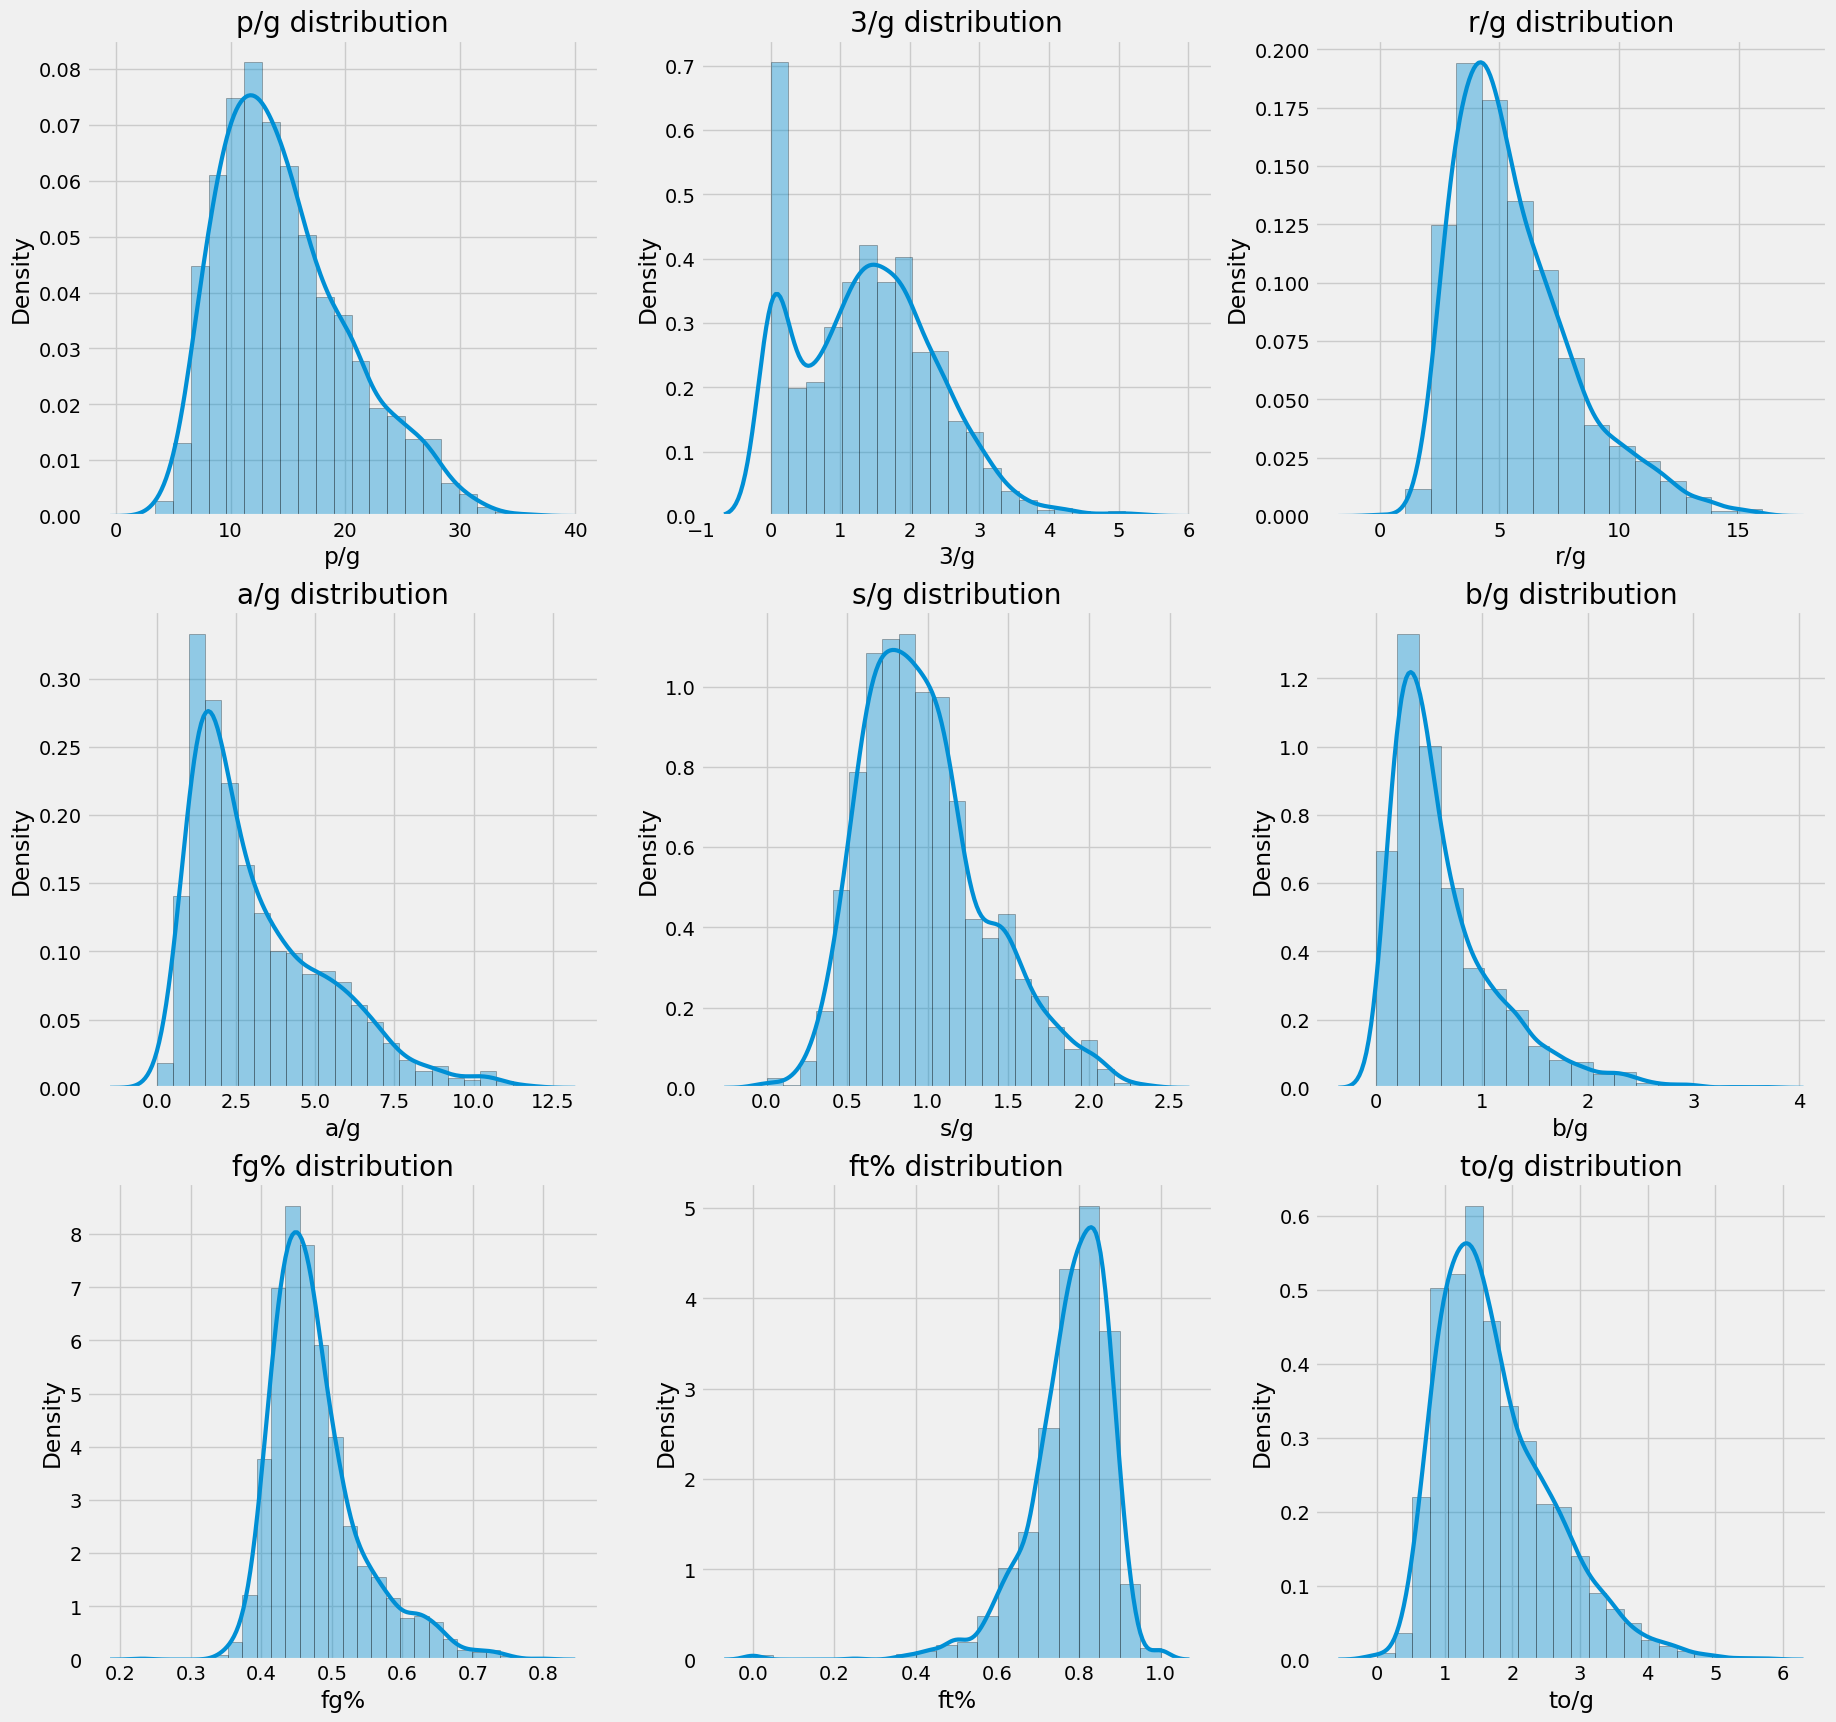

In [3]:
cats_dict = {'p/g':1.5,
             '3/g':0.25,
             'r/g':1,
             'a/g':0.5,
             's/g':0.1,
             'b/g':0.2,
             'fg%':0.02,
             'ft%':0.05,
             'to/g':0.25}



plt.figure(figsize=(20, 20))


for i, (cat, binwidth) in enumerate(cats_dict.items()):
    ax = plt.subplot(3, 3, i + 1)
    
    range_ = (max(df[cat]) - min(df[cat]))
    bins = int(range_ / binwidth)
    if bins == 0:
        bins = 15
    sns.distplot(df[cat], hist = True, kde = True, 
                 kde_kws = {'linewidth': 3}, hist_kws={'edgecolor': 'black'}, bins=bins)

    ax.set_title(f'{cat} distribution')
    
plt.savefig('Graphs/9cat_dist.png', bbox_inches='tight')

 11%|█████                                        | 1/9 [00:57<07:39, 57.45s/it]

p/g - {'gamma': {'a': 4.474866700072994, 'loc': 2.576286526573442, 'scale': 2.722283794409324}} with error 0.006741839285026984


SKIPPED exponpow distribution (taking more than 60 seconds)
 22%|██████████                                   | 2/9 [02:07<07:32, 64.58s/it]

3/g - {'chi2': {'df': 1.7333863656626733, 'loc': -4.460847278236644e-28, 'scale': 1.4498543229415843}} with error 4.797296235809877


SKIPPED exponpow distribution (taking more than 60 seconds)
 33%|███████████████                              | 3/9 [03:14<06:36, 66.07s/it]

r/g - {'lognorm': {'s': 0.3862009862188922, 'loc': -0.5986090915769504, 'scale': 5.779270754014119}} with error 0.03437984237367929


SKIPPED exponpow distribution (taking more than 60 seconds)
 44%|████████████████████                         | 4/9 [04:24<05:37, 67.48s/it]

a/g - {'lognorm': {'s': 0.6302460839803639, 'loc': -0.1835003121322039, 'scale': 2.795648938226954}} with error 0.112381684677191


 56%|█████████████████████████                    | 5/9 [05:20<04:13, 63.48s/it]

s/g - {'lognorm': {'s': 0.24520049248739775, 'loc': -0.565078308412178, 'scale': 1.4988970021409869}} with error 1.5701426198072586


SKIPPED exponpow distribution (taking more than 60 seconds)
 67%|██████████████████████████████               | 6/9 [06:29<03:15, 65.23s/it]

b/g - {'lognorm': {'s': 0.6896790847211158, 'loc': -0.06410516298402036, 'scale': 0.5605022257237455}} with error 0.48202615501204704


 78%|███████████████████████████████████          | 7/9 [07:26<02:05, 62.62s/it]

fg% - {'lognorm': {'s': 0.20633677191396105, 'loc': 0.1761214117074489, 'scale': 0.2953893125460005}} with error 65.3815213311839


SKIPPED lognorm distribution (taking more than 60 seconds)
 89%|████████████████████████████████████████     | 8/9 [08:35<01:04, 64.53s/it]

ft% - {'exponpow': {'b': 9.461593215915713, 'loc': -0.30949915878758133, 'scale': 1.1792090403192481}} with error 18.677365479121615


100%|█████████████████████████████████████████████| 9/9 [09:37<00:00, 63.83s/it]

to/g - {'lognorm': {'s': 0.36358490809266253, 'loc': -0.4784958930123663, 'scale': 2.093607216487146}} with error 0.2735678263373912


100%|█████████████████████████████████████████████| 9/9 [09:37<00:00, 64.22s/it]


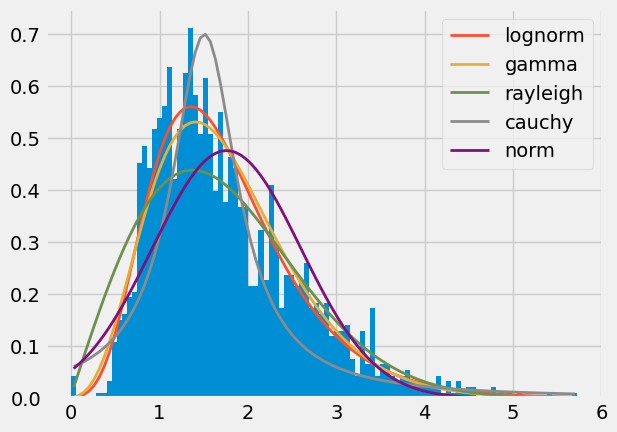

In [36]:
# blks = stats.gamma.rvs(2, loc=1.5, scale=2, size=180)

# for cat, _ in tqdm(cats_dict.items()):
    
#     cat_values = df[cat].values

#     f = Fitter(cat_values, distributions=get_common_distributions(), timeout=60)

#     f.fit()
#     f.summary()
    
#     dist_dict = f.get_best(method = 'sumsquare_error')
#     print(f'{cat} - {dist_dict} with error {f.df_errors["sumsquare_error"].sort_values().iloc[0]}')

/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the d

ERROR! Session/line number was not unique in database. History logging moved to new session 201
0.4661083724654315


/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/franhuzj

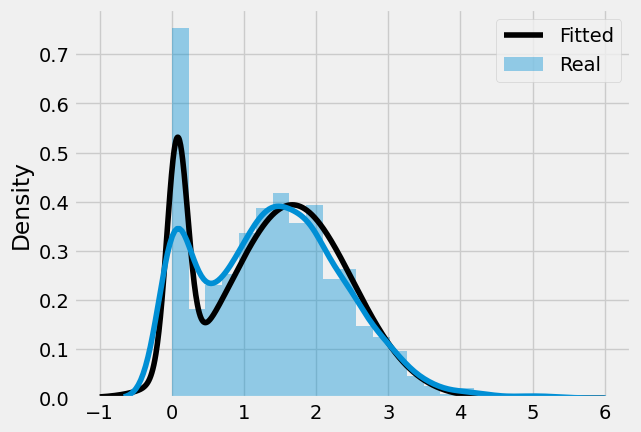

In [86]:
# clf = BayesianGaussianMixture(n_components=2, init_params='k-means++', max_iter=1000, covariance_type='full', tol=1e-6)

# covariances = clf.fit(df['3/g'].values.reshape(-1, 1)).covariances_

# mse = mean_squared_error(covariances[0], covariances[1])
# print(mse)

# draw_pdf(clf, df['3/g'].values)

In [7]:
def z(data):
    mean = np.mean(data)
    std = np.std(data)
    
    return (data - mean) / std

def mix_norm_cdf(x, weights, means, covars):
    mcdf = 0.0
    for i in range(len(weights)):
        mcdf += weights[i] * stats.norm.cdf(x, loc=means[i], scale=covars[i])
    return mcdf

def calc_h_score_3(data, clf):
    probs = mix_norm_cdf(data, means=clf.means_.flatten(), covars=clf.covariances_.flatten(), weights=clf.weights_)
    h_scores = stats.norm.ppf(probs)
    return h_scores

Means: [1.66894348 0.07495573], Covars: [0.7040092 0.0212879] Weights: [0.82865659 0.17134341]


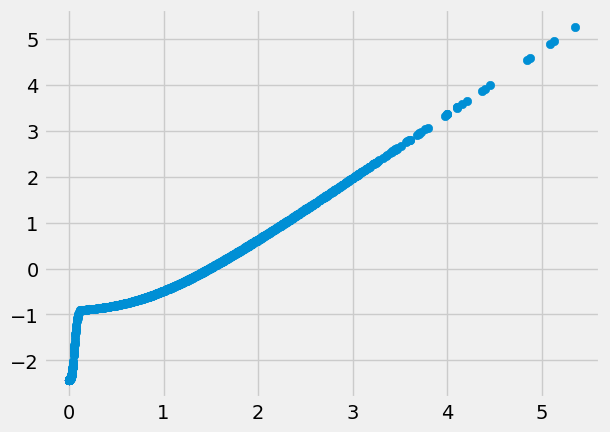

In [8]:
threes = df['3/g'].values

clf = BayesianGaussianMixture(n_components=2)

clf.means_ = np.array([[1.66894348, 0.07495573]])
clf.covariances_ = np.array([[0.7040092, 0.0212879]])
clf.weights_ = np.array([0.82865659, 0.17134341])


plt.scatter(threes, calc_h_score_3(threes, clf))

print(f'Means: {clf.means_.flatten()}, Covars: {clf.covariances_.flatten()} Weights: {clf.weights_}')

In [169]:
df.iloc[0]

Own         Other Active
Round                  1
Rank                   1
Y!Adp                7.0
Y!%                  100
Adv%                 NaN
Adv+-                NaN
Act%                 NaN
Value           0.888303
PosV            0.871766
Name        Nikola Jokic
Team                 DEN
Pos                 PF/C
Inj                  NaN
Status               NaN
g                     72
Playoff                8
Analysts             NaN
m/g            34.556481
p/g            26.361111
3/g             1.277778
r/g            10.833333
a/g             8.319444
s/g             1.319444
b/g             0.680556
fg%             0.566125
fga/g          17.958333
ft%              0.86802
fta/g           5.472222
to/g            3.083333
USG            28.875655
pV              1.641661
3V             -0.449077
rV              1.981495
aV              2.035465
sV              0.913449
bV             -0.002951
fg%V            2.237842
ft%V            1.036192
toV            -1.399351


[1.66894348 0.07495573]
[0.7040092 0.0212879]
[0.82865659 0.17134341]


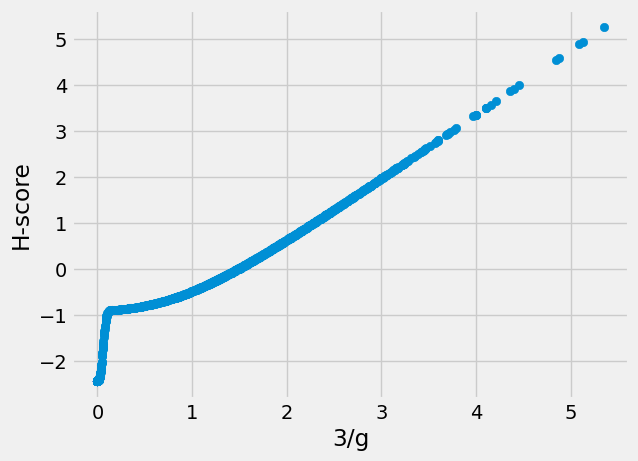

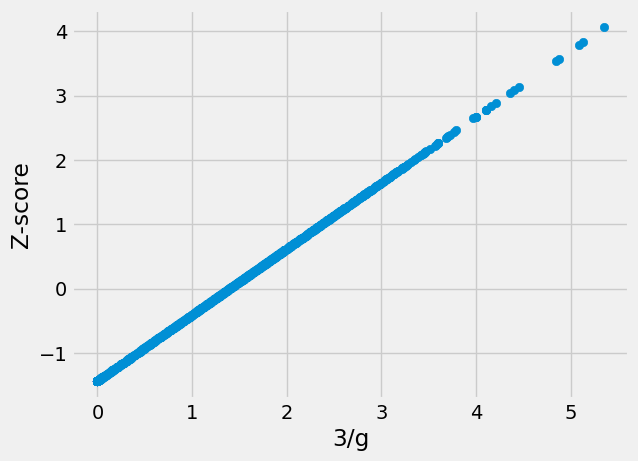

1620


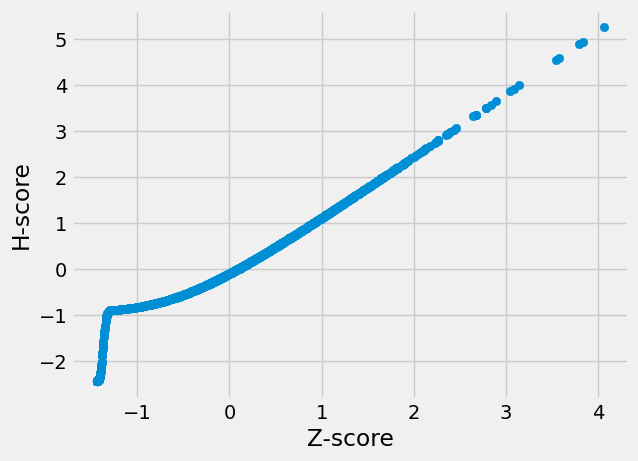

In [162]:
print(clf.means_.flatten())
print(clf.covariances_.flatten())
print(clf.weights_)
    
probs = mix_norm_cdf(df['3/g'].values, means=clf.means_.flatten(), covars=clf.covariances_.flatten(), weights=clf.weights_)

h_scores = stats.norm.ppf(probs)

plt.scatter(df['3/g'].values, h_scores)
plt.xlabel('3/g')
plt.ylabel('H-score')
plt.show()

plt.scatter(df['3/g'].values, z(df['3/g'].values))
plt.xlabel('3/g')
plt.ylabel('Z-score')
plt.show()

print(len(df['3/g']))

plt.scatter(z(df['3/g'].values), h_scores)
plt.ylabel('H-score')
plt.xlabel('Z-score')
plt.show()

In [92]:
# School of thoughts
# Get player1 with ppg_x, apg_x, etc
# Calculate probabilty p(ppg_x) = distribution_p(ppg_x)
# Take that prob and return it to classical z_score with st.norm.pff(.95) = z_score = st.norm.ppf(p(ppg_x))

In [75]:
def draw_pdf(clf, real_data):

    mus = clf.means_
    sigmas = clf.covariances_
    weights = clf.weights_

    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = np.linspace(-1, 6, 1000).reshape(1000,1)
    logprob = clf.score_samples(x)
    pdf = np.exp(logprob)

    ax.plot(x, pdf, '-k', label='Fitted')

    sns.distplot(df['3/g'].values, label='Real')
    plt.legend()
    plt.show()

In [96]:
df['fg%']

0      0.566125
1      0.482051
2      0.505525
3      0.512115
4      0.496608
         ...   
175    0.363190
176    0.445629
177    0.484761
178    0.431562
179    0.459459
Name: fg%, Length: 1620, dtype: float64

  0%|                                                     | 0/2 [00:00<?, ?it/s]SKIPPED _fit distribution (taking more than 60 seconds)
SKIPPED burr distribution (taking more than 60 seconds)
SKIPPED exponweib distribution (taking more than 60 seconds)
SKIPPED fisk distribution (taking more than 60 seconds)
SKIPPED gausshyper distribution (taking more than 60 seconds)
SKIPPED genexpon distribution (taking more than 60 seconds)
SKIPPED genextreme distribution (taking more than 60 seconds)
SKIPPED gengamma distribution (taking more than 60 seconds)
SKIPPED invweibull distribution (taking more than 60 seconds)
SKIPPED rv_continuous distribution (taking more than 60 seconds)
SKIPPED rv_histogram distribution (taking more than 60 seconds)
SKIPPED johnsonsb distribution (taking more than 60 seconds)
SKIPPED kappa4 distribution (taking more than 60 seconds)
SKIPPED ksone distribution (taking more than 60 seconds)
SKIPPED levy_stable distribution (taking more than 60 seconds)
SKIPPED mielke di

fg% - {'norminvgauss': {'a': 2.0137487883063487, 'b': 1.468577983688307, 'loc': 0.41926376729638615, 'scale': 0.05515614001375889}} with error 13.3733757349594

 50%|██████████████████████                      | 1/2 [03:56<03:56, 236.88s/it]

SKIPPED _fit distribution (taking more than 60 seconds)
SKIPPED betaprime distribution (taking more than 60 seconds)
SKIPPED burr distribution (taking more than 60 seconds)
SKIPPED burr12 distribution (taking more than 60 seconds)
SKIPPED crystalball distribution (taking more than 60 seconds)
SKIPPED f distribution (taking more than 60 seconds)
SKIPPED exponweib distribution (taking more than 60 seconds)
SKIPPED fatiguelife distribution (taking more than 60 seconds)
SKIPPED fisk distribution (taking more than 60 seconds)
SKIPPED foldnorm distribution (taking more than 60 seconds)
SKIPPED gausshyper distribution (taking more than 60 seconds)
SKIPPED genexpon distribution (taking more than 60 seconds)
SKIPPED genextreme distribution (taking more than 60 seconds)
SKIPPED gengamma distribution (taking more than 60 seconds)
SKIPPED genpareto distribution (taking more than 60 seconds)
SKIPPED invgauss distribution (taking more than 60 seconds)
SKIPPED invweibull distribution (taking more tha

ft% - {'johnsonsu': {'a': 1.5392683748297058, 'b': 1.643414386447413, 'loc': 0.8939740268254857, 'scale': 0.0903260844441375}} with error 9.569554054279369


100%|████████████████████████████████████████████| 2/2 [08:51<00:00, 265.98s/it]
/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


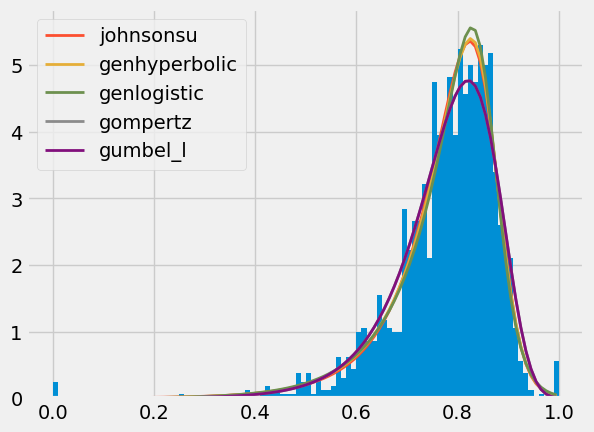

/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [97]:
# for cat in tqdm(['fg%', 'ft%']):
    
#     cat_values = df[cat].values

#     f = Fitter(cat_values, distributions=get_distributions().extend(['beta']), timeout=60)

#     f.fit()
#     f.summary()
    
#     dist_dict = f.get_best(method = 'sumsquare_error')
#     print(f'{cat} - {dist_dict} with error {f.df_errors["sumsquare_error"].sort_values().iloc[0]}')

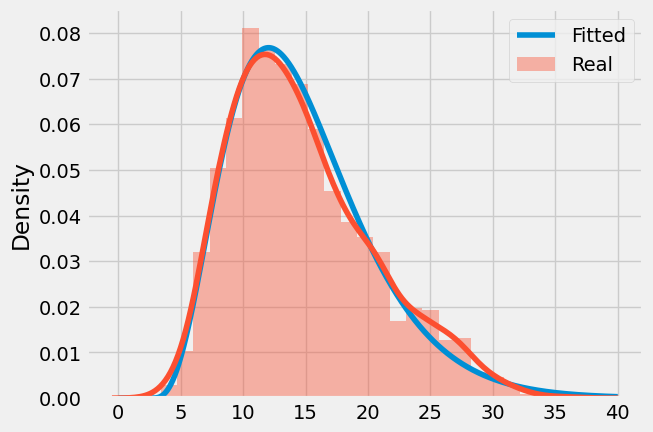

In [173]:
from scipy.stats import gamma

a = 4.474866700072994
loc= 2.576286526573442
scale= 2.722283794409324

x = np.linspace(0, 40, 1000)

rv = gamma(a, loc = loc, scale = scale)

plt.plot(x, rv.pdf(x), label='Fitted')
sns.distplot(df['p/g'].values, label='Real')

plt.legend()
plt.show()

# ppg_prob = rv.pdf(df['p/g'])

[ 1.74118433  2.32870348  1.79776371 ... -0.62499183 -0.14373626
 -0.99392145]


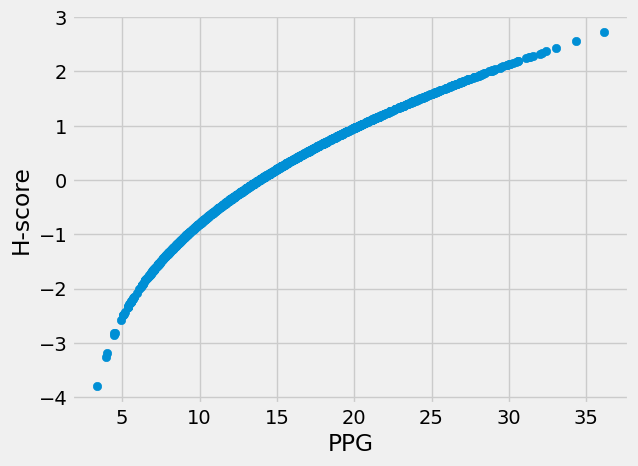

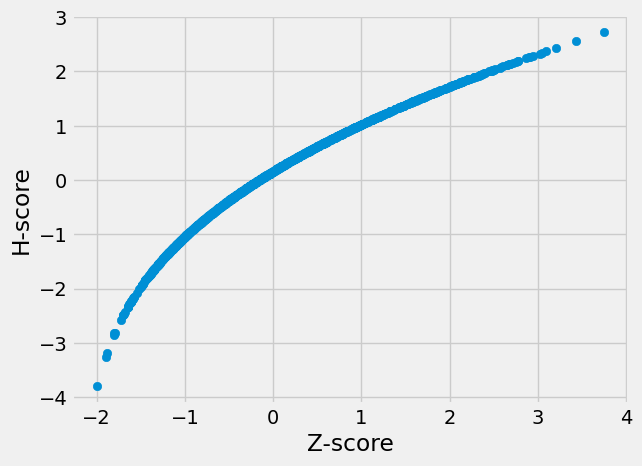

In [121]:
probs = rv.cdf(df['p/g'].values)

z_scores = stats.norm.ppf(probs)
print(z_scores)

plt.scatter(df['p/g'].values, z_scores)
plt.xlabel('PPG')
plt.ylabel('H-score')
plt.show()

mean = np.mean(df['p/g'].values)
std_dev = np.std(df['p/g'].values)

z = lambda x: (x - mean) / std_dev

plt.scatter(z(df['p/g'].values), z_scores)
plt.xlabel('Z-score')
plt.ylabel('H-score')
plt.show()

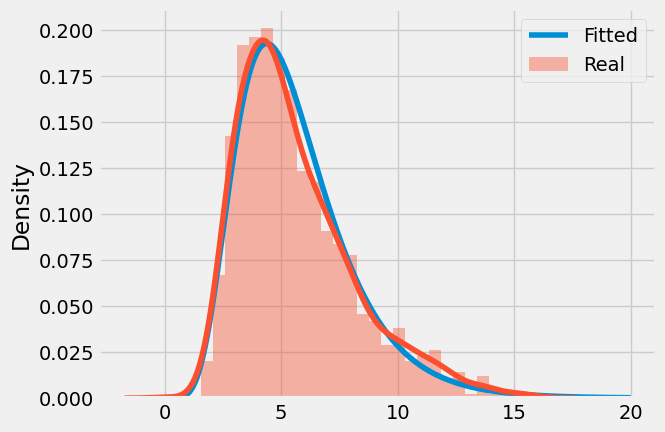

[ 1.76626658  0.13589041 -0.19604121 ...  0.02404003 -0.52103268
 -0.47379158]


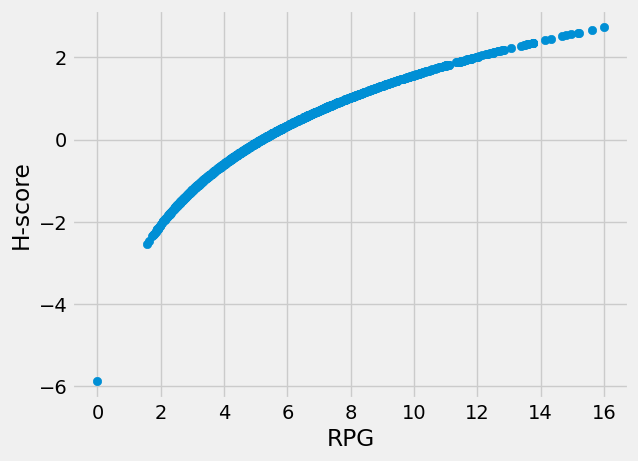

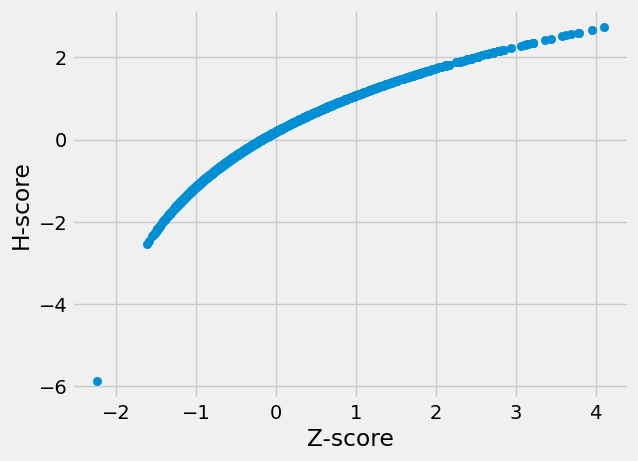

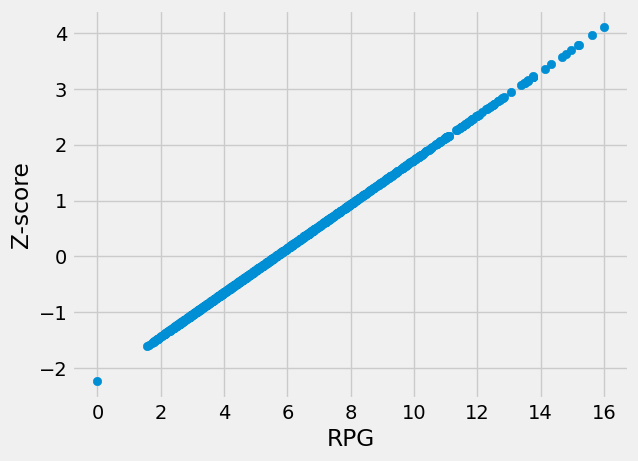

In [127]:
cat = 'r/g' 

a = 0.3862009862188922
loc = -0.5986090915769504
scale = 5.779270754014119

from scipy.stats import lognorm


x = np.linspace(0, 20, 1000)

rv = lognorm(a, loc = loc, scale = scale)

plt.plot(x, rv.pdf(x), label='Fitted')
sns.distplot(df[cat].values, label='Real')

plt.legend()
plt.show()


probs = rv.cdf(df[cat].values)

z_scores = stats.norm.ppf(probs)
print(z_scores)

plt.scatter(df[cat].values, z_scores)
plt.xlabel('RPG')
plt.ylabel('H-score')
plt.show()

mean = np.mean(df[cat].values)
std_dev = np.std(df[cat].values)

z = lambda x: (x - mean) / std_dev

plt.scatter(z(df[cat].values), z_scores)
plt.xlabel('Z-score')
plt.ylabel('H-score')
plt.show()

plt.scatter(df[cat].values, z(df[cat].values))
plt.xlabel('RPG')
plt.ylabel('Z-score')
plt.show()

[ 0.93370572  0.68130459  1.11975724 ... -0.7598869   0.22331353
 -0.55578846]


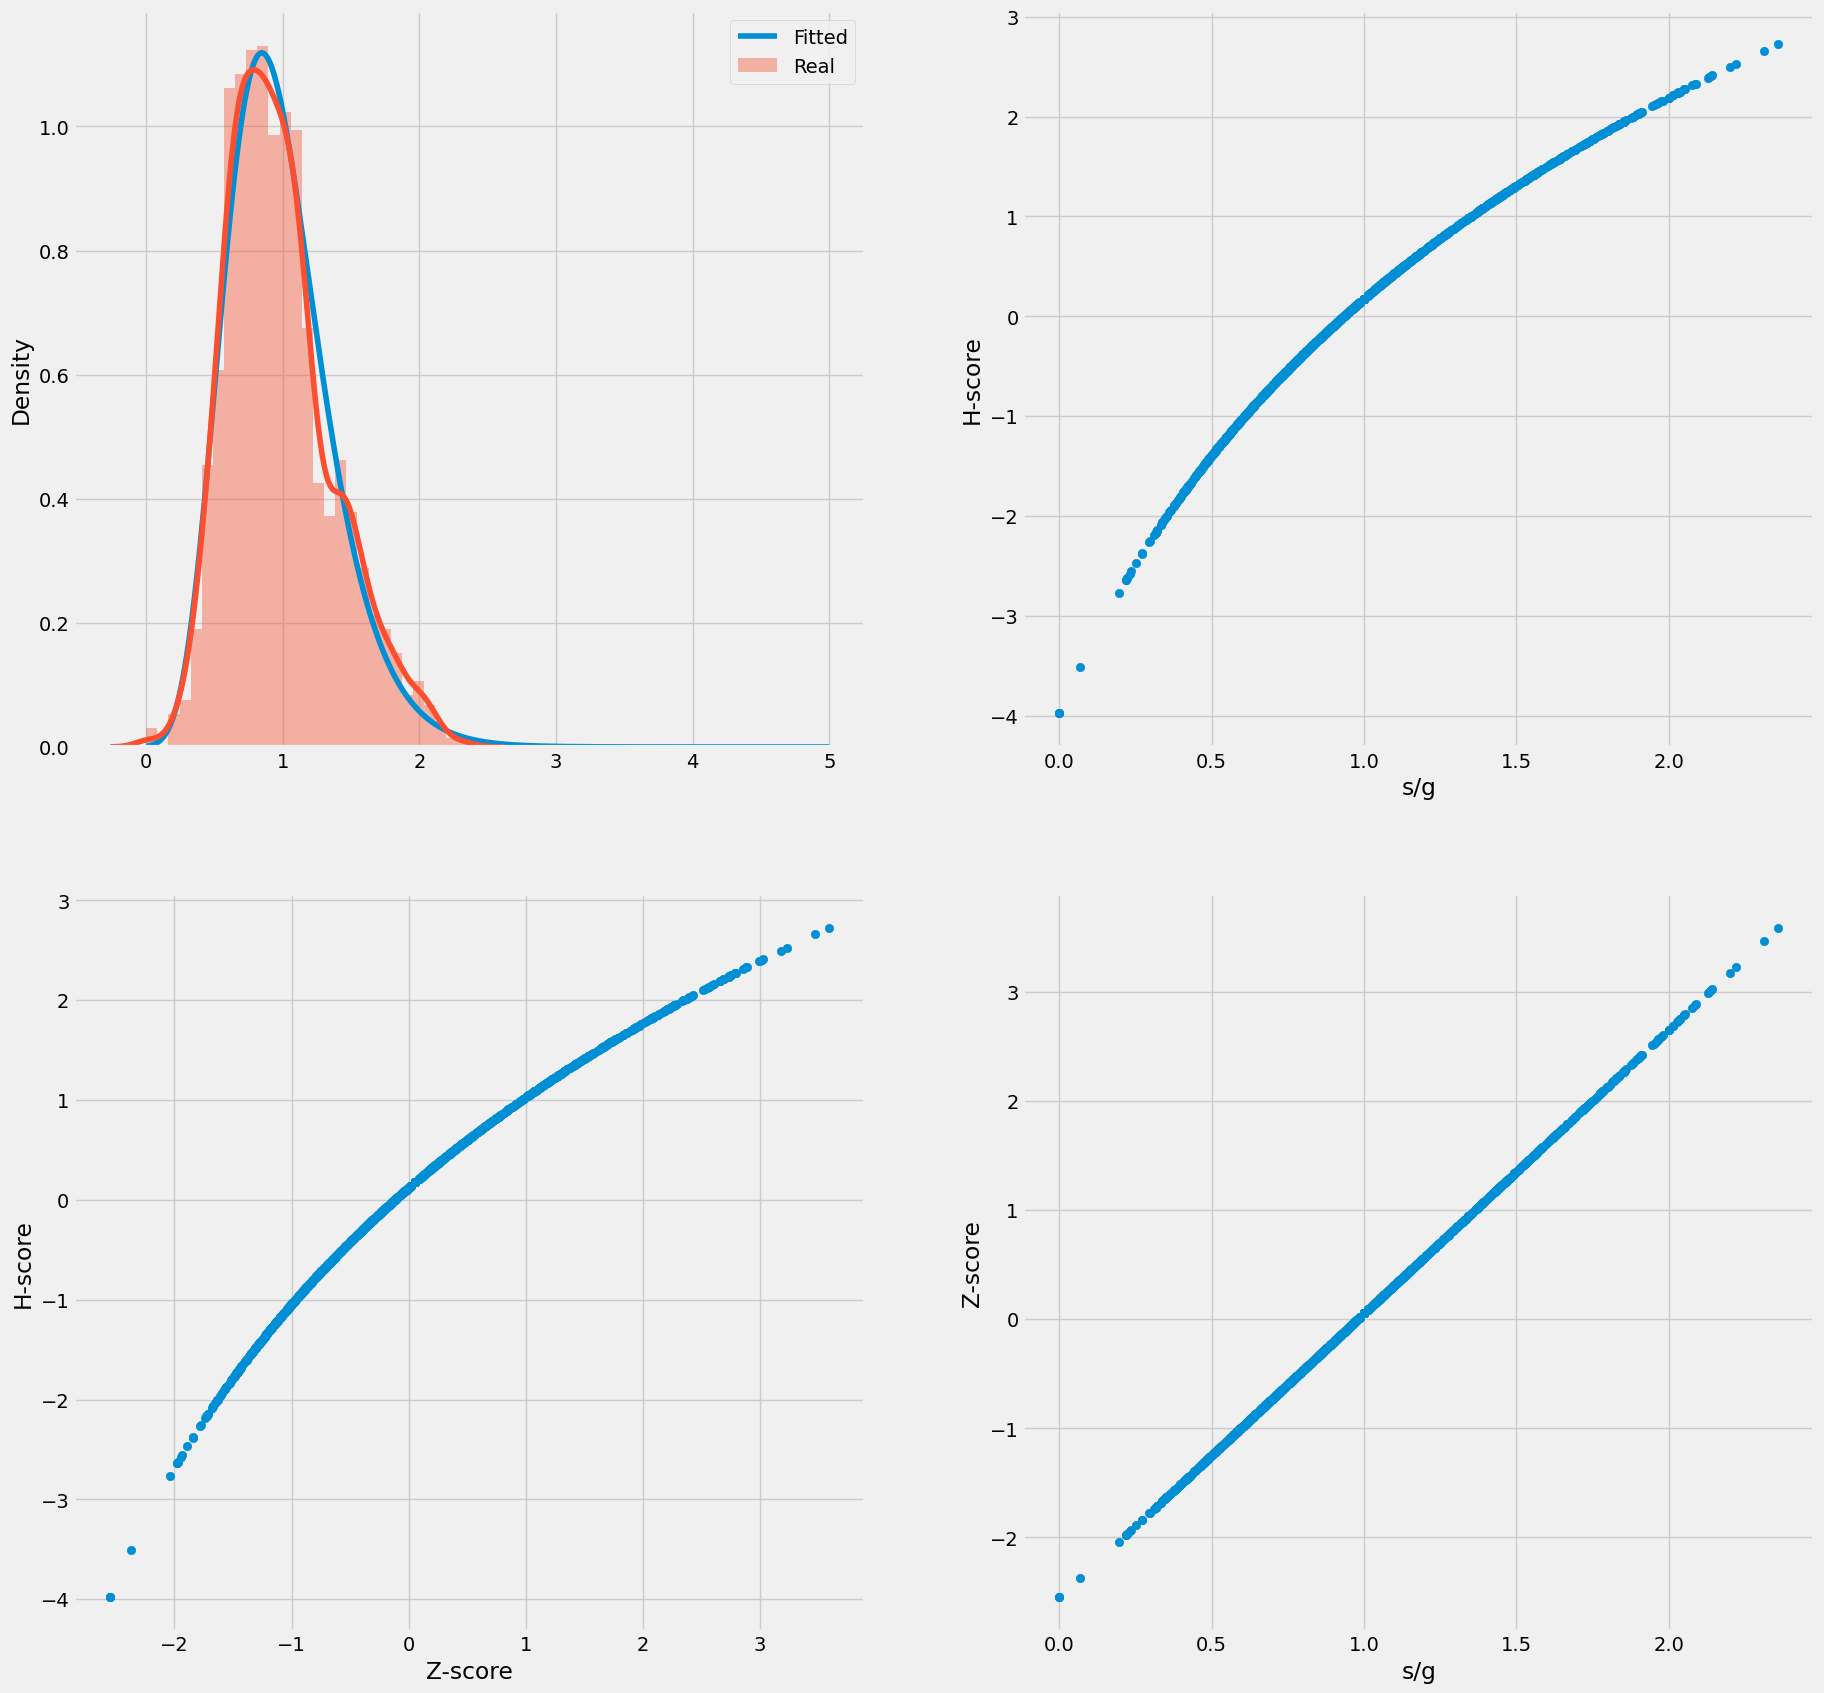

In [133]:
cat = 's/g'
a = 0.24520049248739775
loc= -0.565078308412178
scale = 1.4988970021409869


plt.figure(figsize=(20, 20))

ax = plt.subplot(2, 2, 1)

x = np.linspace(0, 5, 1000)

rv = lognorm(a, loc = loc, scale = scale)
plt.plot(x, rv.pdf(x), label='Fitted')
sns.distplot(df[cat].values, label='Real')

plt.legend()
# plt.show()


probs = rv.cdf(df[cat].values)

h_scores = stats.norm.ppf(probs)
print(h_scores)

ax = plt.subplot(2, 2, 2)

plt.scatter(df[cat].values, h_scores)
plt.xlabel(cat)
plt.ylabel('H-score')
# plt.show()

mean = np.mean(df[cat].values)
std_dev = np.std(df[cat].values)

# z = lambda x: (x - mean) / std_dev

ax = plt.subplot(2, 2, 3)


plt.scatter(z(df[cat].values), h_scores)
plt.xlabel('Z-score')
plt.ylabel('H-score')
# plt.show()

ax = plt.subplot(2, 2, 4)

plt.scatter(df[cat].values, z(df[cat].values))
plt.xlabel(cat)
plt.ylabel('Z-score')
plt.show()

In [4]:
# to/g - {'lognorm': {'s': 0.36358490809266253, 'loc': -0.4784958930123663, 'scale': 2.093607216487146}} - 0.2735678263373912
import json

dist_dict = {'gamma':gamma,
            'lognorm':lognorm,
             'exponpow': exponpow,
             'cauchy': cauchy,
             'genhyperbolic': genhyperbolic
            }

cat_dist_dict = {}

player = {}

cnt = 1

plot = False

plt.figure(figsize=(25, 25))

# ax = plt.subplot(2, 2, 1)

with open('9cat_parameters.txt', 'r') as file:
    lines = file.readlines()
    for line in tqdm(lines):
        if line.startswith('#'):
            continue
        else:
            cat, str_dict, error = line.replace(' ', '').split('_')
            str_dict = str_dict.replace("'", '"')
            par_dict = json.loads(str_dict)
            dist = list(par_dict.keys())[0]
            
            # print(list(par_dict[dist].values()))
            # print('cauchy' in line)
            # if 'cauchy' in line:
            #     loc, scale = list(par_dict[dist].values())
            # if 'genhyperbolic' in line:
            #     p, a, b, loc, scale = list(par_dict[dist].values())
            # else:
            #     a, loc, scale = list(par_dict[dist].values())
        # if cat == 'ft%':
        #     cat_dist_dict[cat] = dist_dict[dist](loc=loc, scale=scale)
        # if cat == 'fg%':
        #     cat_dist_dict[cat] = dist_dict[dist](p, a, b, loc=loc, scale=scale)
        # else:
        #     cat_dist_dict[cat] = dist_dict[dist](a, loc=loc, scale=scale)
            cat_dist_dict[cat] = dist_dict[dist](*list(par_dict[dist].values()))
        
        if '%' in cat:
            cat_a = cat.replace('%', 'a/g')
            made = df[cat] * df[cat_a]

            perc_avg = made.sum() / df[cat_a].sum()

            impact = (df[cat] - perc_avg) * df[cat_a]

            probs = cat_dist_dict[cat].cdf(impact)
            h_scores = stats.norm.ppf(probs)
            
#             plt.figure(figsize=(20, 20))

#             ax = plt.subplot(2, 2, 1)
#             x = np.linspace(np.min(impact), np.max(impact), 100)

#             plt.plot(x, cat_dist_dict[cat].pdf(x), label='Fitted')
#             sns.distplot(impact, label='Real')
#             plt.legend()
            
            if plot:
                ax = plt.subplot(3, 3, cnt)

                plt.scatter(impact, h_scores, label='H-score')
                plt.scatter(impact, z(impact), label='Z-score')
                plt.xlabel(f'{cat} impact')
                plt.ylabel('Score')
                plt.legend()


        else:
            probs = cat_dist_dict[cat].cdf(df[cat].values)
            h_scores = stats.norm.ppf(probs)
            
#             plt.figure(figsize=(20, 20))

#             ax = plt.subplot(2, 2, 1)
#             x = np.linspace(np.min(df[cat].values), np.max(df[cat].values), 1000)

#             plt.plot(x, cat_dist_dict[cat].pdf(x), label='Fitted')
#             sns.distplot(df[cat].values, label='Real')
#             plt.legend()

#             fig.suptitle(f'{cat} information', fontsize=16)

            if plot:
                ax = plt.subplot(3, 3, cnt)

                plt.scatter(df[cat].values, h_scores, label='H-score')
                plt.scatter(df[cat].values, z(df[cat].values), label='Z-score')
                plt.xlabel(cat)
                plt.ylabel('Score')
                plt.legend()
        
        cnt += 1

if plot:
    ax = plt.subplot(3, 3, 9)

    probs = mix_norm_cdf(df['3/g'].values, means=clf.means_.flatten(), covars=clf.covariances_.flatten(), weights=clf.weights_)
    h_scores = stats.norm.ppf(probs)

    plt.scatter(threes, h_scores, label='H-score')
    plt.scatter(threes, z(threes), label='Z-score')
    plt.xlabel('3/g')
    plt.ylabel('Score')
    plt.legend()

    # plt.show()
    plt.savefig('Graphs/h_vs_z_score.png', bbox_inches='tight')

100%|███████████████████████████████████████████| 15/15 [00:00<00:00, 33.19it/s]


<Figure size 2500x2500 with 0 Axes>

In [10]:
mus = clf.means_
sigmas = clf.covariances_
weights = clf.weights_

if plot:
    plt.figure(figsize=(20, 20))
    fig.suptitle(f'{cat} information', fontsize=16)

    x = np.linspace(np.min(threes) - 2, np.max(threes), 1000).reshape(1000,1)
    logprob = clf.score_samples(x)
    pdf = np.exp(logprob)

    ax = plt.subplot(2, 2, 1)


    ax.plot(x, pdf, '-k', label='Fitted')
    sns.distplot(df['3/g'].values, label='Real')
    plt.legend()
    # plt.show()

    probs = mix_norm_cdf(df['3/g'].values, means=clf.means_.flatten(), covars=clf.covariances_.flatten(), weights=clf.weights_)

    h_scores = stats.norm.ppf(probs)

    ax = plt.subplot(2, 2, 2)

    plt.scatter(threes, h_scores, label='H-score')
    plt.scatter(threes, z(threes), label='Z-score')
    plt.xlabel('3/g')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

    # ax = plt.subplot(2, 2, 3)

    # plt.scatter(z(threes), h_scores)
    # plt.ylabel('H-score')
    # plt.xlabel('Z-score')

    # ax = plt.subplot(2, 2, 4)


    # plt.scatter(threes, z(df['3/g'].values))
    # plt.xlabel('3/g')
    # plt.ylabel('Z-score')
    # plt.show()

In [11]:
probs = mix_norm_cdf([4.875], means=clf.means_.flatten(), covars=clf.covariances_.flatten(), weights=clf.weights_)

probs

array([0.99999782])

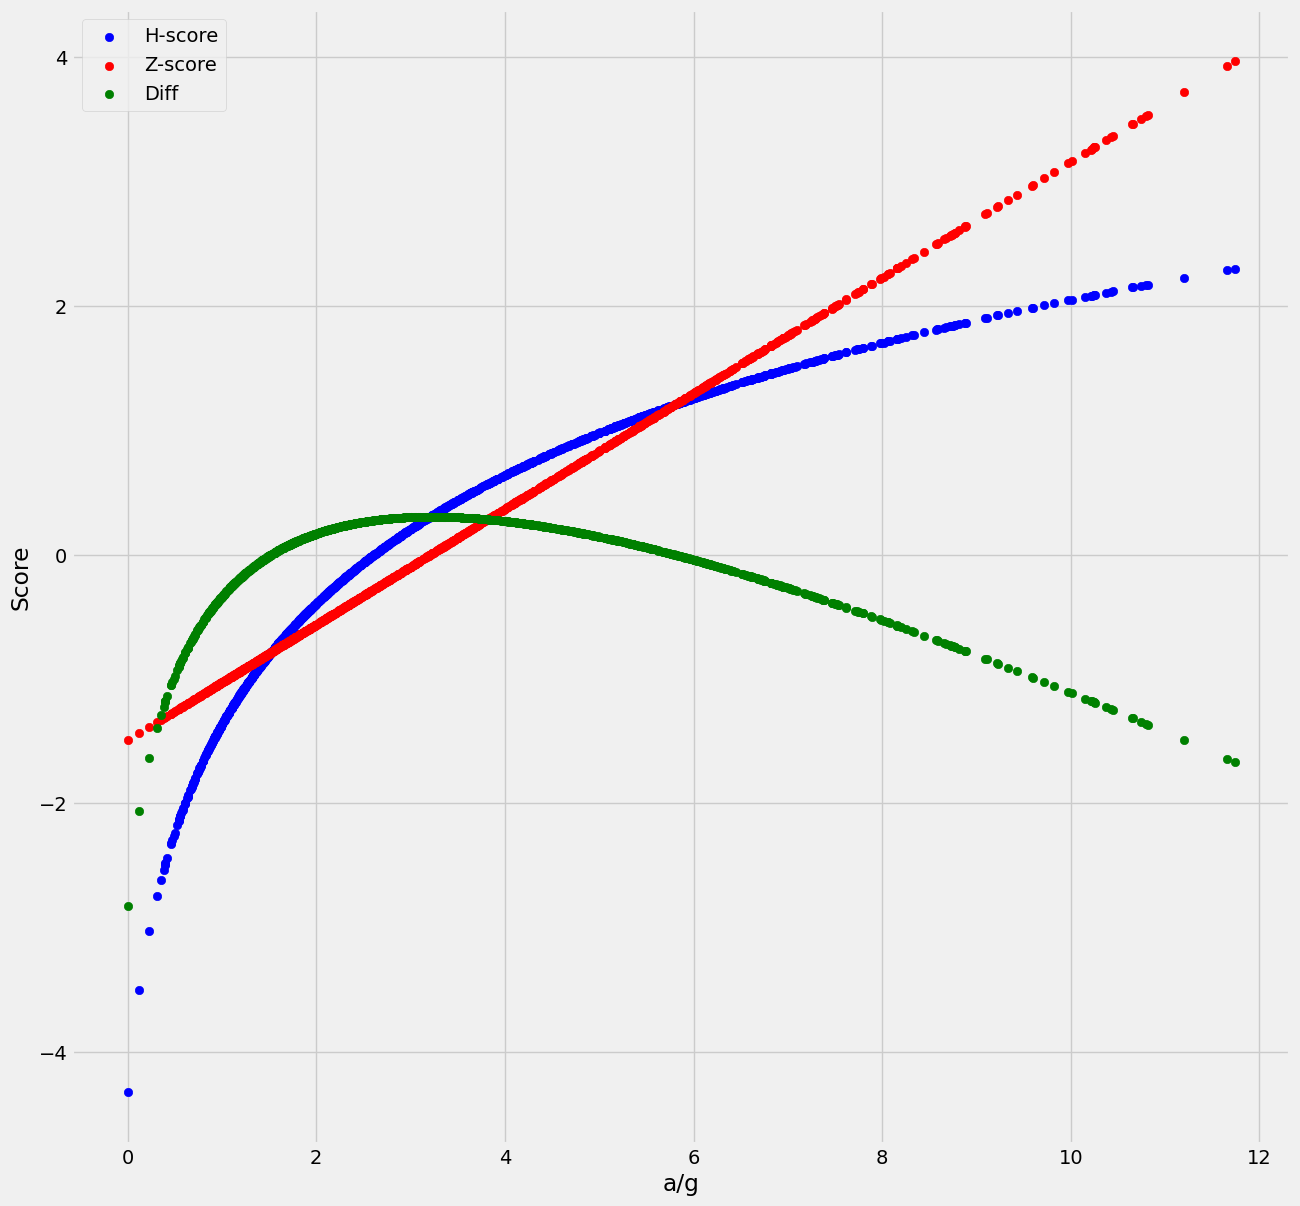

In [194]:
plt.figure(figsize=(14, 14))

cat = 'a/g'

probs = cat_dist_dict[cat].cdf(df[cat].values)
h_scores = stats.norm.ppf(probs)


plt.scatter(df[cat].values, h_scores, color='b', label='H-score')
plt.scatter(df[cat].values, z(df[cat].values), color='r', label='Z-score')
plt.scatter(df[cat].values, h_scores - z(df[cat].values), color='g', label='Diff')

plt.xlabel(cat)
plt.ylabel('Score')

plt.legend()
plt.show()

In [14]:
def calc_h_score(data, cat):        
    probs = cat_dist_dict[cat].cdf(data[cat].values)
    h_scores = stats.norm.ppf(probs)
    if cat == 'to/g':
        return -h_scores
    return h_scores

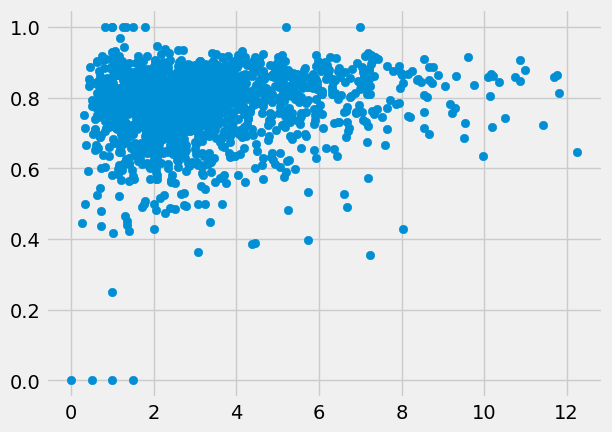

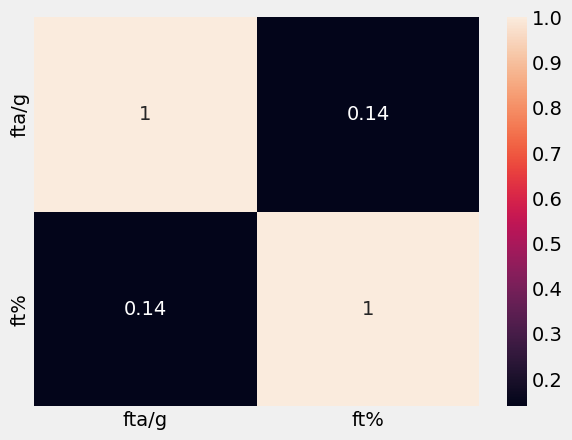

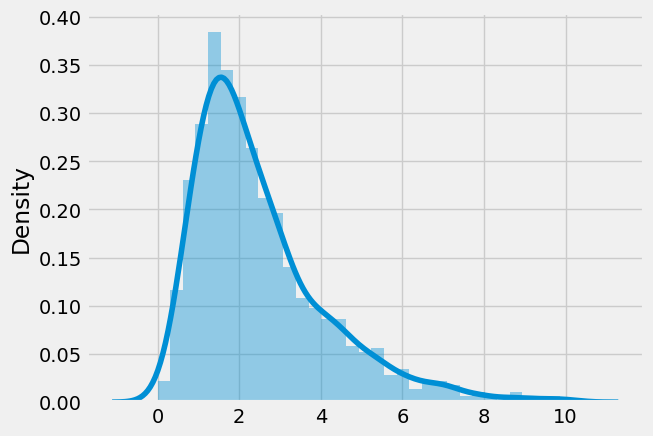

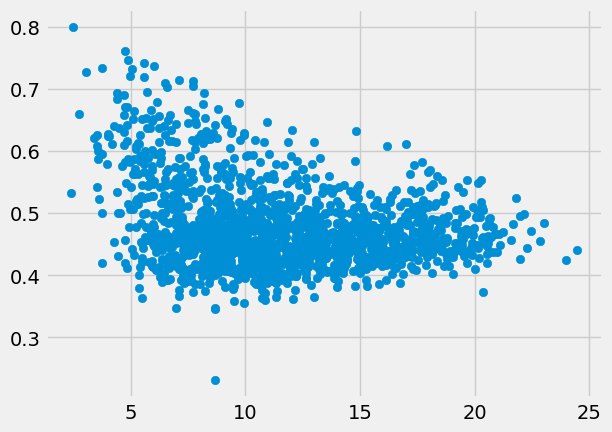

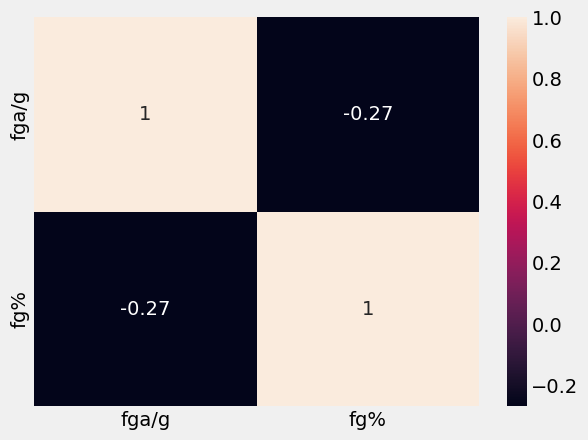

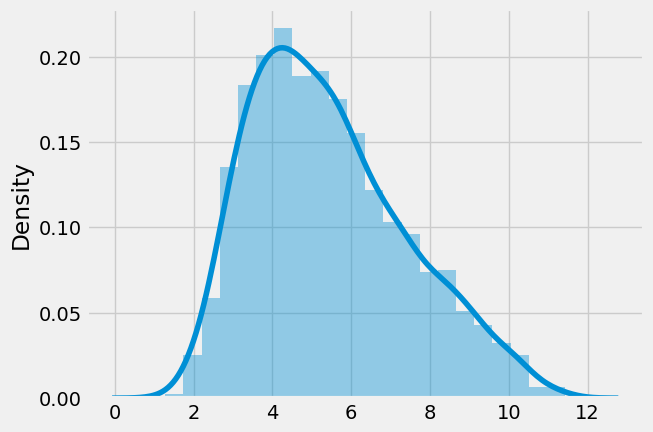

In [301]:
for cat in ['ft%', 'fg%']:
    cat_a = cat.replace('%', 'a/g')
    plt.scatter(df[cat_a], df[cat])
    plt.show()

    data = pd.concat([df[cat_a], df[cat]], axis=1)

    # print(data)

    dataplot = sns.heatmap(data.corr(), annot=True)
    plt.show()
    
    data = df[cat_a] * df[cat]
    
    sns.distplot(data)
    plt.show()

In [ ]:
# f = Fitter(cat_values, distributions=get_common_distributions(), timeout=60)

# f.fit()
# f.summary()

# dist_dict = f.get_best(method = 'sumsquare_error')
# print(f'{cat} - {dist_dict} with error {f.df_errors["sumsquare_error"].sort_values().iloc[0]}')

In [15]:
def calc_perc_h_score(data, cat):
    cat_a = cat.replace('%', 'a/g')
    shots_made = df[cat].values * df[cat_a].values
    perc_avg = shots_made.sum() / df[cat_a].sum()
    impact = (data[cat] - perc_avg) * h_score_df[cat_a]
    
    probs = cat_dist_dict[cat].cdf(impact)
    
    h_scores = stats.norm.ppf(probs)

    return h_scores


df_2022 = pd.read_excel('/Users/franhuzjan/Downloads/Rankings/BBM_PlayerRankings.xls')

df_2022.head()

h_score_df = df_2022.copy()

# print(calc_h_score(df['p/g'], 'p/g'))
cats = ['p/g', '3/g', 'r/g', 'a/g', 's/g', 'b/g', 'to/g', 'ft%', 'fg%']

for cat in cats:
    if '%' in cat:
        h_score_df[f'{cat}_hV'] = calc_perc_h_score(h_score_df, cat)
    elif '3' in cat:
        h_score_df['3/g_hV'] = calc_h_score_3(h_score_df['3/g'], clf)
    else:
        h_score_df[f'{cat}_hV'] = calc_h_score(h_score_df, cat)

# h_score_df['3/g_hV'] = calc_h_score_3(h_score_df['3/g'], clf)

h_scores_columns = []

for column_name in cats:
    column_name = f'{column_name}_hV'
    h_scores_columns.append(column_name)
            
h_score_df['CARUSO'] = h_score_df[h_scores_columns].mean(axis=1)


# print(h_score_df[h_score_df['Name'] == 'Nicolas Claxton'][h_scores_columns])

columns_to_keep = ['Rank', 
                   'Value',
                   'CARUSO',
                   'Name']

columns_to_keep.extend(h_scores_columns)
columns_to_keep.extend(cats)
columns_to_keep.extend(['fta/g', 'fga/g'])

# columns_to_keep.extend(['ft%_hV', 'ft%', 'fta/g', 'fg%_hV', 'fg%', 'fga/g'])

h_score_df = h_score_df[columns_to_keep]

h_score_df = h_score_df.sort_values(by=['CARUSO'], ascending=False)


# for name in ['Walker Kessler', 'Nicolas Claxton', 'Jaren Jackson Jr.']:
#     print(h_score_df.index[h_score_df['Name'] == name].tolist()[0], name, h_score_df[h_score_df['Name'] == name][h_scores_columns])

# print((np.array(list(h_score_df.index)) + 1))
h_score_df = h_score_df.reset_index(drop=True)

h_score_df['Rank Change'] = h_score_df['Rank'] - (h_score_df.index + 1)

columns = list(h_score_df.columns)

rk_chg = columns.pop()
columns.insert(1, rk_chg)

h_score_df = h_score_df[columns]

h_score_df = h_score_df.sort_values(by=['3/g_hV'], ascending=False)

h_score_df.head(30)

# h_score_df.to_excel("caruso.xlsx")
# h_score_df.to_csv('bratula_csv.csv')

# h_score_df[h_score_df['Name'] == 'Nicolas Claxton']

,Rank,Rank Change,Value,CARUSO,Name,p/g_hV,3/g_hV,r/g_hV,a/g_hV,s/g_hV,...,3/g,r/g,a/g,s/g,b/g,to/g,ft%,fg%,fta/g,fga/g
0,6,5,0.585714,1.044339,Stephen Curry,2.071272,4.593358,0.378098,1.331211,-0.014302,...,4.875000,6.089286,6.285714,0.928571,0.357143,3.196429,0.914591,0.493380,5.017857,20.232143
55,65,9,-0.027346,0.256047,Klay Thompson,1.205212,3.871815,-0.511378,-0.148532,-0.659086,...,4.362319,4.144928,2.362319,0.710145,0.420290,1.782609,0.878788,0.436102,1.913043,18.144928
15,7,-9,0.569520,0.658512,Damian Lillard,2.347112,3.653522,-0.188030,1.568143,-0.200048,...,4.206897,4.775862,7.327586,0.862069,0.310345,3.293103,0.913978,0.462562,9.620690,20.724138
63,67,3,-0.033522,0.184393,Louis King,0.958478,3.363351,-0.591722,-0.392125,0.176208,...,4.000000,4.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.615385,1.000000,13.000000
28,30,1,0.169764,0.413992,LaMelo Ball,1.381090,3.363351,0.501844,1.788098,0.842523,...,4.000000,6.416667,8.444444,1.277778,0.305556,3.583333,0.836066,0.410541,3.388889,20.027778
8,15,6,0.416835,0.804807,Donovan Mitchell,1.948959,2.808197,-0.454648,0.793590,1.218772,...,3.602941,4.250000,4.426471,1.455882,0.397059,2.647059,0.866848,0.484308,5.411765,20.617647
48,49,0,0.046822,0.283410,Buddy Hield,0.492785,2.804095,-0.082235,0.109820,0.549466,...,3.600000,5.000000,2.812500,1.150000,0.325000,1.737500,0.821705,0.457611,1.612500,12.975000
100,101,0,-0.139319,0.023991,Anfernee Simons,1.100944,2.552516,-1.534358,0.669861,-0.765112,...,3.419355,2.596774,4.080645,0.677419,0.225806,2.064516,0.893855,0.446890,2.887097,16.854839
11,11,-1,0.499830,0.757704,Jayson Tatum,2.137022,2.308030,1.250944,0.859376,0.314685,...,3.243243,8.770270,4.621622,1.054054,0.689189,2.878378,0.853698,0.466325,8.405405,21.067568
3,9,5,0.536832,0.925407,Kyrie Irving,1.817543,2.155915,-0.051584,1.130402,0.428803,...,3.133333,5.066667,5.516667,1.100000,0.750000,2.133333,0.904762,0.493766,4.550000,20.050000


In [19]:
df_2023 = pd.read_excel('/Users/franhuzjan/Downloads/BBM_Projections (4).xls')
import csv
# df_2023 = pd.read_csv('/Users/franhuzjan/Downloads/hashtag_proj.csv', quoting=csv.QUOTE_NONE, on_bad_lines='skip')
# df_2023 = pd.read_excel('/Users/franhuzjan/Downloads/hashtag_proj.xlsx')
# df_2023 = df_2023.replace('\n','', regex=True)

h_score_df = df_2023.copy()

# 0.537(10.8/20.0)
# f = lambda x: float(x['FT'].split('(')[0])
# h_score_df['ft%'] = h_score_df.apply(f, axis=1)


# f = lambda x: float(x['FG'].split('(')[0])
# h_score_df['fg%'] = h_score_df.apply(f, axis=1)


# f = lambda x: float(x['FT'].split('(')[1].split('/')[-1].replace(')', ''))

# h_score_df['fta/g'] = h_score_df.apply(f, axis=1)

# f = lambda x: float(x['FG'].split('(')[1].split('/')[-1].replace(')', ''))

# h_score_df['fga/g'] = h_score_df.apply(f, axis=1)

print(h_score_df.head())

cats = ['p/g', 
        '3/g',
        'r/g',
        'a/g',
        's/g',
        'b/g',
        # 'to/g',
        'ft%', 
        'fg%']

for cat in cats:
    if '%' in cat:
        h_score_df[f'{cat}_hV'] = calc_perc_h_score(h_score_df, cat)
    elif '3' in cat:
        h_score_df['3/g_hV'] = calc_h_score_3(h_score_df['3/g'], clf)
    else:
        h_score_df[f'{cat}_hV'] = calc_h_score(h_score_df, cat)

# h_score_df['3/g_hV'] = calc_h_score_3(h_score_df['3/g'], clf)

h_scores_columns = []

for column_name in cats:
    column_name = f'{column_name}_hV'
    h_scores_columns.append(column_name)
        
h_score_df['CARUSO'] = h_score_df[h_scores_columns].mean(axis=1)

# print(h_score_df[h_score_df['Name'] == 'Nicolas Claxton'][h_scores_columns])

columns_to_keep = ['Rank', 
                   'Value',
                   'CARUSO',
                   'Name', 
                   'Y!Adp'
                  ]

columns_to_keep.extend(h_scores_columns)
columns_to_keep.extend(cats)
columns_to_keep.extend(['fta/g', 'fga/g'])

# columns_to_keep.extend(['ft%_hV', 'ft%', 'fta/g', 'fg%_hV', 'fg%', 'fga/g'])

h_score_df = h_score_df[columns_to_keep]

h_score_df = h_score_df.drop(h_score_df[h_score_df['Y!Adp'] <= 0].index)
h_score_df = h_score_df.drop(h_score_df[h_score_df['Y!Adp'] >= 150].index)

print(np.max(h_score_df['Y!Adp']))


h_score_df = h_score_df.sort_values(by=['CARUSO'], ascending=False)


# for name in ['Walker Kessler', 'Nicolas Claxton', 'Jaren Jackson Jr.']:
#     print(h_score_df.index[h_score_df['Name'] == name].tolist()[0], name, h_score_df[h_score_df['Name'] == name][h_scores_columns])

# print((np.array(list(h_score_df.index)) + 1))
h_score_df = h_score_df.reset_index(drop=True)

h_score_df['CARUSO Rank'] = h_score_df.index + 1

rk_chg = columns.pop()
columns.insert(1, rk_chg)

# h_score_df['ADP-CRank'] = h_score_df['Y!Adp'] - h_score_df['CARUSO Rank']

h_score_df['Rank Change'] = h_score_df['Rank'] - (h_score_df.index + 1)

columns = list(h_score_df.columns)

rk_chg = columns.pop()
columns.insert(1, rk_chg)

h_score_df = h_score_df[columns]

# h_score_df.head(50)


today = date.today()

h_score_df.to_excel(f'caruso_{today}.xlsx')

# # print(h_score_df.index[h_score_df['Name'] == 'Mark Williams'].tolist())

# player = h_score_df[h_score_df['Name'] == 'Walker Kessler']

# player['s/g'] = 0.6

# player['s/g_hV'] = calc_h_score(player, 's/g')

# print(player[h_scores_columns].mean(axis=1))

h_score_df.head(50)

   Own  Round  Rank  Y!Adp  Y!XRank  Y!%   Adv%  Adv+-     Value      PosV  \
0  NaN      1     1    1.1        1  100  100.0    0.0  0.785450  0.721651   
1  NaN      1     2    3.5        3  100  100.0    0.0  0.679755  0.615956   
2  NaN      1     3    6.8        6  100  100.0    0.0  0.671215  0.695191   
3  NaN      1     4    5.3        4  100  100.0    0.0  0.649432  0.673408   
4  NaN      1     5    6.6        7  100  100.0    0.0  0.627195  0.592708   

   ...      to/g        pV        3V        rV        aV        sV        bV  \
0  ...  3.401408  1.058553 -0.867513  2.456522  2.439050  0.678514  0.090508   
1  ...  3.253485  2.390204 -0.489054  1.903641  0.087446  0.027658  1.274006   
2  ...  2.628592  0.829234  1.272624 -1.015375  3.259250  2.038683 -0.341692   
3  ...  2.776515  2.322865 -0.647762 -0.454727  0.538003  1.928431  0.106693   
4  ...  3.154394  2.031230  3.008101 -0.241171  0.949500  0.494806 -0.614959   

       fg%V      ft%V       toV  
0  2.701011  0.4

,Rank,Rank Change,Value,CARUSO,Name,Y!Adp,p/g_hV,3/g_hV,r/g_hV,a/g_hV,...,3/g,r/g,a/g,s/g,b/g,ft%,fg%,fta/g,fga/g,CARUSO Rank
0,1,0,0.785450,1.294765,Nikola Jokic,1.1,1.478105,-0.659275,2.076160,1.938421,...,0.769859,12.286761,9.301831,1.180141,0.763521,0.819011,0.610526,5.901831,15.133099,1
1,5,3,0.627195,1.264336,Stephen Curry,6.6,2.137905,4.595920,0.131854,1.261677,...,4.876818,5.482576,6.008333,1.126515,0.375455,0.918996,0.475420,5.506667,21.180000,2
2,2,-1,0.679755,1.257233,Joel Embiid,3.5,2.358423,-0.332034,1.779582,0.677889,...,1.170909,10.892273,4.102273,0.990152,1.414545,0.837999,0.525899,12.009848,20.016515,3
3,13,9,0.431282,1.101424,Kevin Durant,11.5,1.742771,0.656697,0.757156,1.152640,...,2.020909,7.143636,5.597121,0.735758,1.252879,0.897009,0.522404,6.134697,18.043030,4
4,3,-2,0.671215,1.034631,Tyrese Haliburton,6.8,1.305975,2.023964,-0.870974,2.216018,...,3.037746,3.529859,11.115352,1.577183,0.525775,0.864987,0.485299,4.660986,16.071690,5
5,6,0,0.571672,1.023257,Kawhi Leonard,26.9,1.581003,0.791743,0.614681,0.571765,...,2.125000,6.729138,3.825000,1.416724,0.637414,0.876989,0.504303,5.666724,17.708966,6
6,4,-3,0.649432,1.022825,Shai Gilgeous-Alexander,5.3,2.317852,-0.484919,-0.108294,1.009507,...,1.002727,4.943939,5.098485,1.545000,0.772424,0.878998,0.497822,11.756667,20.626515,7
7,8,0,0.522159,1.016183,Kyrie Irving,12.6,1.640210,1.881908,-0.199566,0.971879,...,2.934545,4.751970,4.974697,1.188030,0.668182,0.909986,0.492797,4.337727,18.858939,8
8,9,0,0.476766,0.984674,Jayson Tatum,5.4,2.075384,2.271212,1.210013,0.943732,...,3.216667,8.623333,4.884000,1.071600,0.610533,0.854992,0.465240,8.280933,20.603867,9
9,12,2,0.433307,0.967379,Luka Doncic,2.6,2.230978,2.418448,1.248500,1.649360,...,3.322857,8.761429,7.722063,1.262222,0.519683,0.741002,0.478259,9.168413,21.829524,10


Onyeka Okongwu 54 105.1
Ben Simmons 82 126.7
Miles Bridges 58 99.7
Tobias Harris 52 92.5
Wendell Carter Jr. 63 101.6
Bruce Brown 80 117.9
Ausar Thompson 102 139.5
Zach Collins 79 115.4
Josh Hart 93 127.1
Paul Reed 110 142.7
______________________
Tyus Jones 1626145 142 82.6
Bobby Portis 1626171 165 109.4
Jalen Green 1630224 127 77.9
Walker Kessler 1631117 96 48.7
Trae Young 1629027 65 18.8
Gary Trent Jr. 1629018 154 108.9
Malik Beasley 1627736 176 134.9
Clint Capela 203991 114 77.0
Jabari Smith Jr 1631095 128 92.2
Al Horford 201143 162 126.5


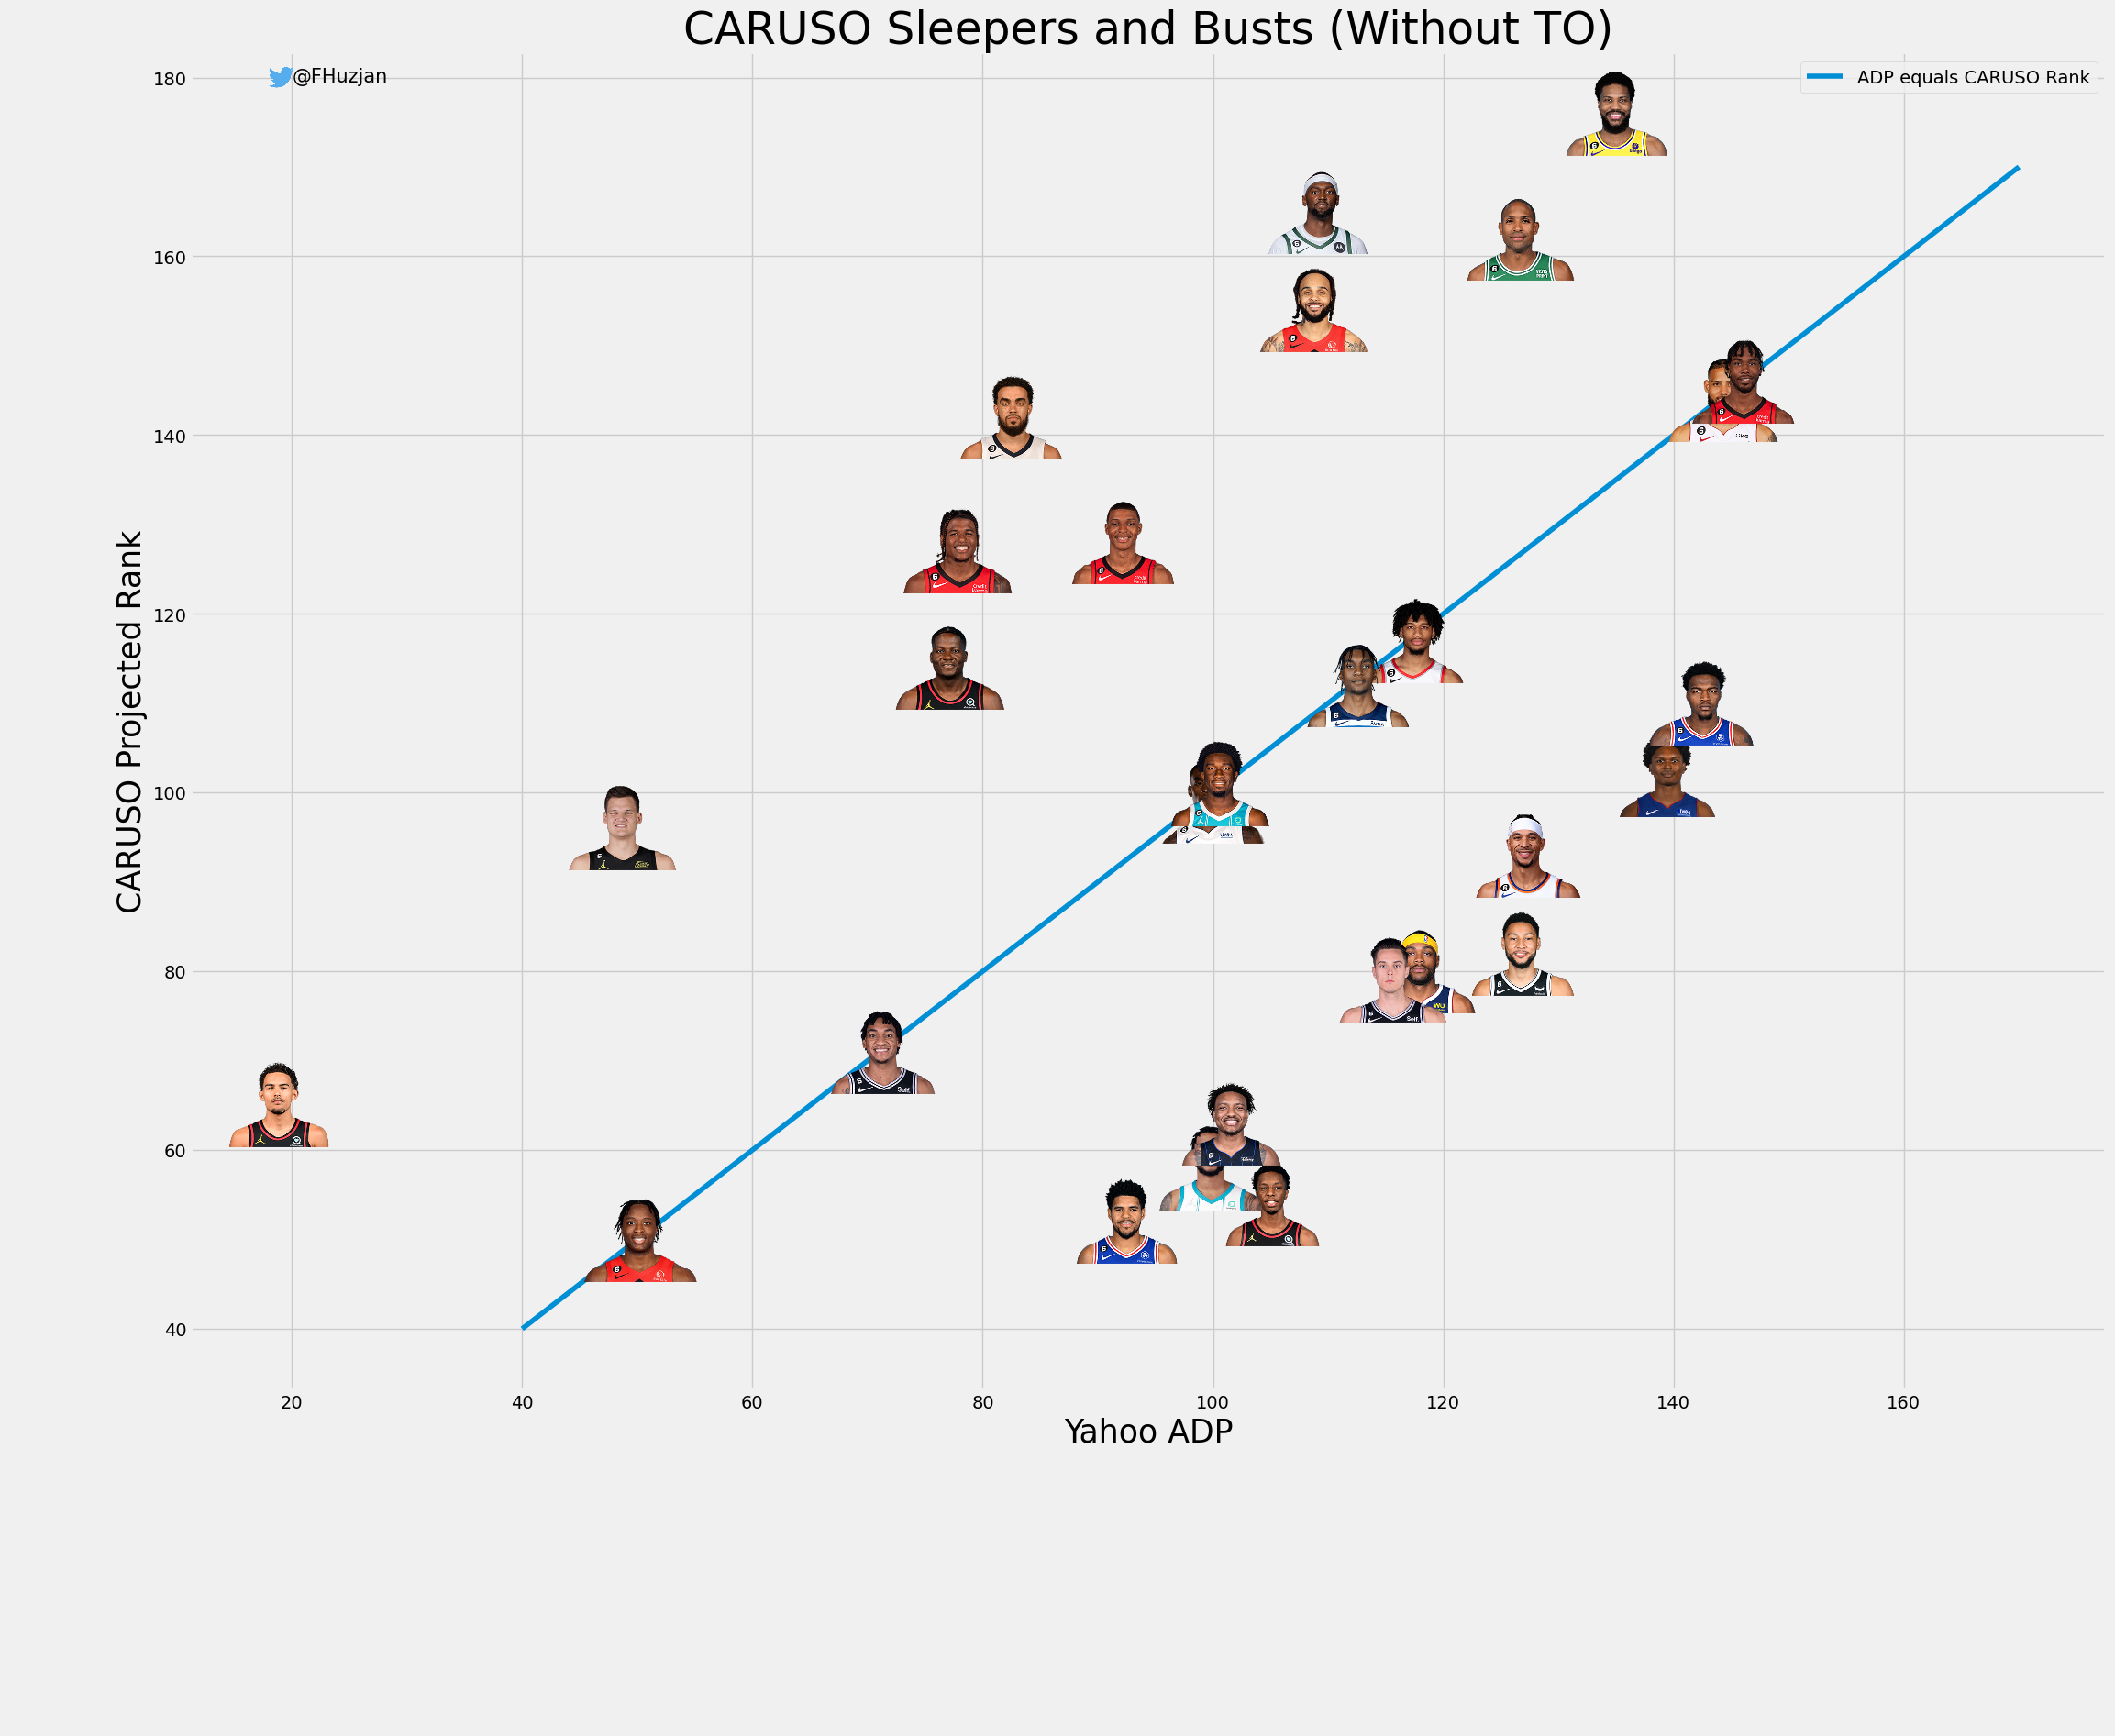

In [103]:
h_score_df = h_score_df.sort_values(by=['ADP-CRank'], ascending=False)

h_score_df.replace("Kevin Porter", "Kevin Porter Jr.", inplace=True)
h_score_df.replace("Nicolas Claxton", "Nic Claxton", inplace=True)
h_score_df.replace("Herb Jones", "Herbert Jones", inplace=True)
h_score_df.replace("C.J. McCollum", "CJ McCollum", inplace=True)
h_score_df.replace("PJ Washington", "P.J. Washington", inplace=True)
h_score_df.replace("Gary Trent", "Gary Trent Jr.", inplace=True)

h_score_df.head(10)

fig, ax = plt.subplots(figsize=(24, 18))

zoom = 0.35
player_root_dir = 'player_imgs/'

def get_player_img(player_id):
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

ax.plot([40, 170], [40, 170], label='ADP equals CARUSO Rank')

previous_id = 0

for i in range(10):
    sleeper = h_score_df.iloc[i]
    adp = sleeper['Y!Adp']
    caruso_rank = sleeper['CARUSO Rank']
    
    try:
        print(sleeper['Name'],caruso_rank, adp)
        sleeper_id = find_players_by_full_name(sleeper['Name'])[0]['id']

    except:
        if sleeper['Name'] == 'Scoot Henderson':
            sleeper_id = 1630703
        if sleeper['Name'] == 'Ausar Thompson':
            sleeper_id = 1641709
            
    previous_id = sleeper_id
    
    ab = AnnotationBbox(get_player_img(sleeper_id), (adp, caruso_rank), frameon=False)
    ax.add_artist(ab)
    
    ax.scatter(adp, caruso_rank, color='r')
    
    # print(sleeper['Rank'], sleeper['Name'])
    # print(bust['Rank'], bust['Name'])
    
print('______________________')

for i in range(10):
    bust = h_score_df.iloc[-i - 1]
    adp = bust['Y!Adp']
    caruso_rank = bust['CARUSO Rank']

    try:
        bust_id = find_players_by_full_name(bust['Name'])[0]['id']
        print(bust['Name'], bust_id, caruso_rank ,adp)
    except:
        if bust['Name'] == 'Scoot Henderson':
            bust_id = 1630703
        if bust['Name'] == 'Brandon Miller':
            bust_id = 1641706
        if bust['Name'] == 'Jarace Walker':
            continue
        print(i, 'Bust', bust['Name'], bust_id, caruso_rank)

        
            
    if previous_id == bust_id:
        print(bust['Name'])

    previous_id = bust_id
    
    
    ab = AnnotationBbox(get_player_img(bust_id), (adp, caruso_rank), frameon=False)
    ax.add_artist(ab)
    
    ax.scatter(adp, caruso_rank, color='b')
    
good_adp = h_score_df[np.abs(h_score_df['ADP-CRank']) < 0.75]

    
for i in range(len(good_adp)):
    player = good_adp.iloc[i]
    
    # print(player['Name'])
    adp = player['Y!Adp']
    caruso_rank = player['CARUSO Rank']
    
    player_id = find_players_by_full_name(player['Name'])[0]['id']
    
    ab = AnnotationBbox(get_player_img(player_id), (adp, caruso_rank), frameon=False)
    ax.add_artist(ab)


plt.legend()    
ax.set_xlabel("Yahoo ADP", fontsize=25)
ax.set_ylabel("CARUSO Projected Rank", fontsize=25)
ax.set_title("CARUSO Sleepers and Busts (Without TO)", fontdict={'fontsize': 35})
ab = AnnotationBbox(OffsetImage(plt.imread(f'twitter_logo (1).png'), zoom=0.1), (19, 180), frameon=False)
ax.add_artist(ab)
ax.text(x=20, y=179.5, ha='left', s='@FHuzjan', size=15)
plt.savefig('caruso_sleepers_busts.png', bbox_inches='tight')

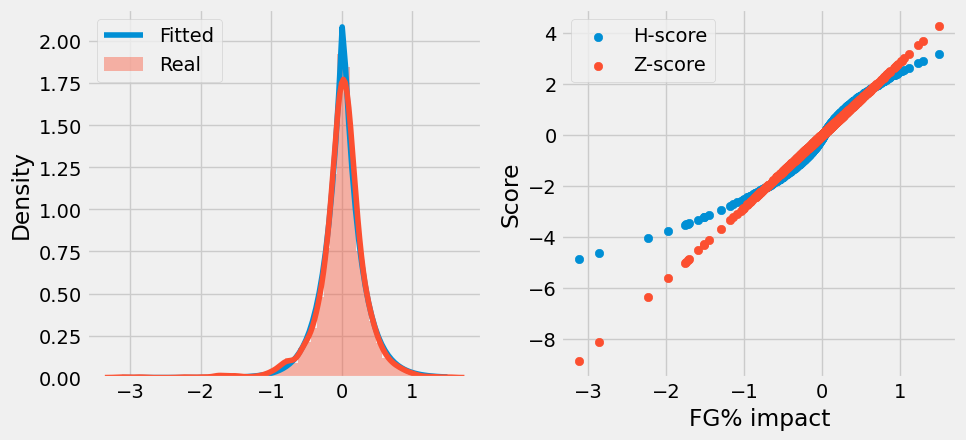

In [490]:
cat = 'fg%'

cat_a = cat.replace('%', 'a/g')

made = df[cat] * df[cat_a]
perc_avg = made.sum() / df[cat_a].sum()
impact = (df[cat] - perc_avg) * df[cat_a]

# for _ in tqdm([1]):
#     f = Fitter(fg_impact, distributions=get_distributions(), timeout=5)

#     f.fit()
#     f.summary()

#     dist_dict = f.get_best(method = 'sumsquare_error')
#     for i in range(5):
#         print(f'{cat} - {dist_dict} with error {f.df_errors["sumsquare_error"].sort_values().iloc[i]}')

# fg_impact 'lognorm': {'s': 0.18866707190848425, 'loc': -3.3452100643007268, 'scale': 3.513180752614178}}
# ft% _ {'cauchy': {'loc': 0.024849596691108797, 'scale': 0.13957296822068735}} _ 0.5244414716442263


import scipy
fg_impact_dist = scipy.stats.laplace(loc=0.01790596676844252, scale=0.22993564193541663)
probs = fg_impact_dist.cdf(fg_impact)
h_scores = stats.norm.ppf(probs)
plt.figure(figsize=(10, 10))

ax = plt.subplot(2, 2, 1)
x = np.linspace(np.min(fg_impact), np.max(fg_impact), 100)

plt.plot(x, fg_impact_dist.pdf(x), label='Fitted')
sns.distplot(fg_impact, label='Real')
plt.legend()

ax = plt.subplot(2, 2, 2)

plt.scatter(fg_impact, h_scores, label='H-score')
plt.scatter(fg_impact, z(fg_impact), label='Z-score')
plt.xlabel('FG% impact')
plt.ylabel('Score')
plt.legend()

plt.show()


In [362]:
# fga/g, fta/g


made = df[cat] * df[cat_a]
perc_avg = made.sum() / df[cat_a].sum()
impact = (df[cat] - perc_avg) * df[cat_a]

probs = cat_dist_dict['ft%'].cdf(impact)
probs_a = cat_dist_dict['fta/g'].cdf(5)

tot_probs = probs * probs_a
h_scores_multi = stats.norm.ppf(probs * probs_a)

h_scores = stats.norm.ppf(probs)
h_scores_a = stats.norm.ppf(probs_a)
mean_h_scores = np.mean([h_scores, h_scores_a])

print(h_scores, h_scores_a, h_scores_multi, mean_h_scores)
# print(mean_h_scores)

probs = cat_dist_dict['ft%'].cdf(0.95)
probs_a = cat_dist_dict['fta/g'].cdf(10)

tot_probs = probs * probs_a
h_scores_multi = stats.norm.ppf(probs * probs_a)

h_scores = stats.norm.ppf(probs)
h_scores_a = stats.norm.ppf(probs_a)
mean_h_scores = np.mean([h_scores, h_scores_a])

print(h_scores, h_scores_a, h_scores_multi, mean_h_scores)


0.07393207269683302 1.0354068500075206 -0.12586139440905536 0.5546694613521769
2.6297731176823467 2.2824843218697817 2.1582423472606846 2.456128719776064


['p/g', '3/g', 'r/g', 'a/g', 's/g', 'b/g', 'to/g', 'ft%', 'fg%', 'p/g_hV', '3/g_hV', 'r/g_hV', 'a/g_hV', 's/g_hV', 'b/g_hV', 'to/g_hV', 'ft%_hV', 'fg%_hV']


Text(0.5, 1.0, 'Correlation between categories')

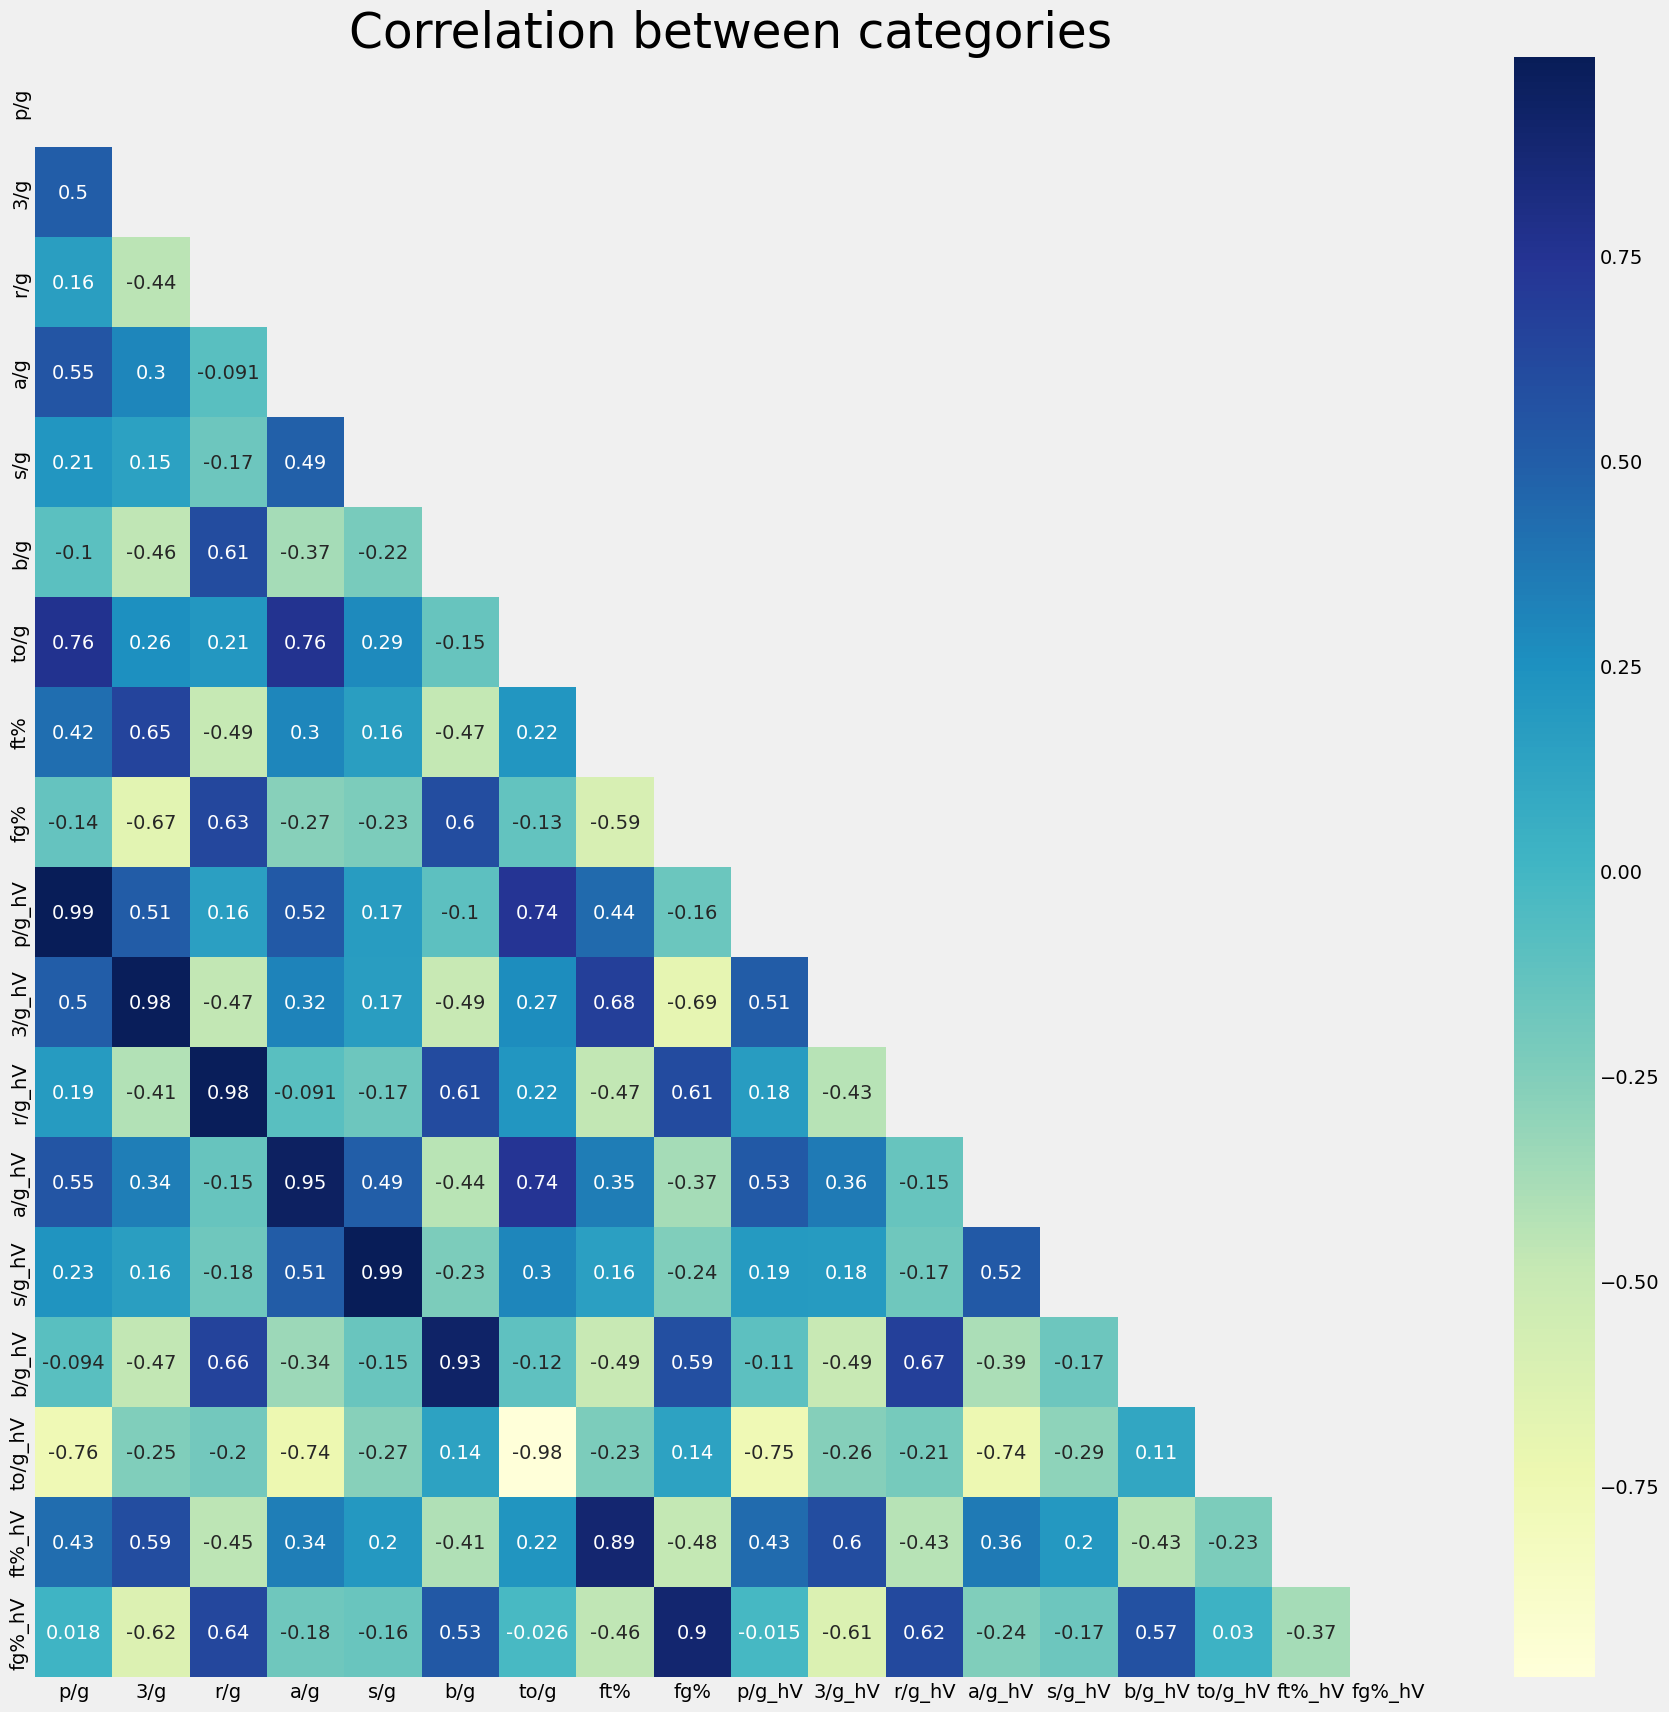

In [122]:
cats = ['p/g', '3/g', 'r/g', 'a/g', 's/g', 'b/g', 'to/g', 'ft%', 'fg%']

h_score_cats = []

for cat in cats:
    h_score_cats.append(f'{cat}_hV')
    
cats.extend(h_score_cats)

print(cats)

corr_df = h_score_df[cats]

corr= corr_df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 

fig, ax = plt.subplots(figsize=(20, 20))

# cmap = 'vlag'
cmap = "YlGnBu"
dataplot = sns.heatmap(corr, cmap=cmap, annot=True, mask=matrix)
  
# plt.axis('off')
plt.grid(False)
plt.title('Correlation between categories', fontsize=35)
# displaying heatmap

In [114]:
# from scipy.stats import multivariate_normal

# # f = Fitter(df['3/g'].values, distributions=['multivariate_normal'], timeout=60)

# clf = sklearn.mixture.DPGMM(n_components=2, init_params='k-means++', max_iter=1000, covariance_type='full', tol=1e-6)

# covariances = clf.fit(df['3/g'].values.reshape(-1, 1)).covariances_

# # mse = mean_squared_error(covariances[0], covariances[1])
# # print(mse)

# draw_pdf(clf, df['3/g'].values)

# sklearn.mixture.

calc_h_score_3(2.7, clf)

1.5609557974171824